### mnist, fashion
- alpha = 0.01
- latent dimensions = 200
- epochs = 11
- batch size = 32
- learning rate = 0.001
- hidden size 400

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
os.chdir('..')

In [74]:
import warnings
warnings.filterwarnings('ignore', '', UserWarning)

## Train mnist

In [3]:
import torch
import torchvision

torch.manual_seed(1)
torch.cuda.manual_seed(1)
device = 'gpu'

In [214]:
latent_size = 200
batch_size = 32
hidden_size = 400
alpha = 0.01
learning_rate = 0.001
epochs = 11
dataset = 'mnist'
device = 'cuda'
log_interval = 500
report_interval = 100
reload_model = False
sample_size = 64
normalize=False

In [215]:
from src.utils import get_datasets
train_loader, test_loader, (width, height, channels) = get_datasets(
    dataset, batch_size, device, root='data')

Loading mnist dataset...
Done!



In [218]:
from src.models.vsc import VariationalSparseCoding
vsc = VariationalSparseCoding(dataset, width, height, channels, hidden_size,
                              latent_size, learning_rate, alpha, device, 
                              log_interval, normalize)

In [219]:
%%time
vsc.run_training(train_loader, test_loader, epochs, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/60000 (0%)]	Loss: 1416.420410
Train Epoch: 1 [16000/60000 (27%)]	Loss: 192.615005
Train Epoch: 1 [32000/60000 (53%)]	Loss: 170.620850
Train Epoch: 1 [48000/60000 (80%)]	Loss: 169.633179
====> Epoch: 1 Average loss: 188.4059
====> Test set loss: 156.3619 - VLB-VSC : 4995.5882
Train Epoch: 2 [0/60000 (0%)]	Loss: 155.101898
Train Epoch: 2 [16000/60000 (27%)]	Loss: 150.065735
Train Epoch: 2 [32000/60000 (53%)]	Loss: 145.896423
Train Epoch: 2 [48000/60000 (80%)]	Loss: 149.546204
====> Epoch: 2 Average loss: 151.2661
====> Test set loss: 145.6413 - VLB-VSC : 4653.0752
Train Epoch: 3 [0/60000 (0%)]	Loss: 152.279144
Train Epoch: 3 [16000/60000 (27%)]	Loss: 143.079498
Train Epoch: 3 [32000/60000 (53%)]	Loss: 148.213028
Train Epoch: 3 [48000/60000 (80%)]	Loss: 136.836243
====> Epoch: 3 Average loss: 144.3120
====> Test set loss: 141.0480 - VLB-VSC : 4506.3250
Train Epoch: 4 [0/60000 (0%)]	Loss: 131.289505
Train Epoch: 4 [16000/60000 (27%)]	Loss: 135.724823

In [227]:
from src.models.vsc import VariationalSparseCoding
vsc_mem = VariationalSparseCoding(dataset, width, height, channels, hidden_size,
                              latent_size, learning_rate, alpha, device, 
                              log_interval, normalize)

In [228]:
 %%time
vsc_mem.run_training(train_loader, test_loader, epochs, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/60000 (0%)]	Loss: 1424.810913
Train Epoch: 1 [16000/60000 (27%)]	Loss: 205.214172
Train Epoch: 1 [32000/60000 (53%)]	Loss: 173.087219
Train Epoch: 1 [48000/60000 (80%)]	Loss: 167.104065
====> Epoch: 1 Average loss: 193.4478
====> Test set loss: 154.4248 - VLB-VSC : 4933.7010
Train Epoch: 2 [0/60000 (0%)]	Loss: 149.585022
Train Epoch: 2 [16000/60000 (27%)]	Loss: 138.020004
Train Epoch: 2 [32000/60000 (53%)]	Loss: 152.675262
Train Epoch: 2 [48000/60000 (80%)]	Loss: 156.329391
====> Epoch: 2 Average loss: 151.0087
====> Test set loss: 146.5089 - VLB-VSC : 4680.7943
Train Epoch: 3 [0/60000 (0%)]	Loss: 147.352982
Train Epoch: 3 [16000/60000 (27%)]	Loss: 142.615845
Train Epoch: 3 [32000/60000 (53%)]	Loss: 144.673233
Train Epoch: 3 [48000/60000 (80%)]	Loss: 139.321198
====> Epoch: 3 Average loss: 145.8864
====> Test set loss: 143.4041 - VLB-VSC : 4581.6013
Train Epoch: 4 [0/60000 (0%)]	Loss: 155.902756
Train Epoch: 4 [16000/60000 (27%)]	Loss: 145.874023

In [226]:
from src.model_size import SizeEstimator

se = SizeEstimator(vsc.model, input_size=(32,1,28,28))
print(se.estimate_size())

# Returns
# (size in megabytes, size in bits)
# (408.2833251953125, 3424928768)

print(se.param_bits) # bits taken up by parameters
# print(se.forward_backward_bits) # bits stored for forward and backward
print(se.input_bits) # bits for input

(3.717315673828125, 31183104)
30380288
802816


In [17]:
vsc.run_training(train_loader, test_loader, epochs, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/60000 (0%)]	Loss: 555.352722


/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Train Epoch: 1 [16000/60000 (27%)]	Loss: 148.427460
Train Epoch: 1 [32000/60000 (53%)]	Loss: 148.468994
Train Epoch: 1 [48000/60000 (80%)]	Loss: 143.555206
====> Epoch: 1 Average loss: 148.3422
====> Test set loss: 130.1404 - VLB-VSC : 4157.8392
Train Epoch: 2 [0/60000 (0%)]	Loss: 135.636337
Train Epoch: 2 [16000/60000 (27%)]	Loss: 127.047226
Train Epoch: 2 [32000/60000 (53%)]	Loss: 130.115662
Train Epoch: 2 [48000/60000 (80%)]	Loss: 135.534943
====> Epoch: 2 Average loss: 128.6161
====> Test set loss: 125.7970 - VLB-VSC : 4019.0744
Train Epoch: 3 [0/60000 (0%)]	Loss: 111.416817
Train Epoch: 3 [16000/60000 (27%)]	Loss: 128.017624
Train Epoch: 3 [32000/60000 (53%)]	Loss: 122.018997
Train Epoch: 3 [48000/60000 (80%)]	Loss: 130.082977
====> Epoch: 3 Average loss: 125.4124
====> Test set loss: 123.4196 - VLB-VSC : 3943.1195
Train Epoch: 4 [0/60000 (0%)]	Loss: 137.882721
Train Epoch: 4 [16000/60000 (27%)]	Loss: 124.610703
Train Epoch: 4 [32000/60000 (53%)]	Loss: 107.120903
Train Epoch: 4 [4

In [18]:
mnist_images, _ = iter(test_loader).next()

In [24]:
batch.shape, z.shape, mu.shape

(torch.Size([32, 784]), torch.Size([32, 8]), torch.Size([32, 8]))

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def plot_image(img, ax):
    ax.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')

In [172]:
def plot_encoding(image, vsc, latent_sz, alpha, negative=True, width=1/7):
    flattened_image = vsc.normalize(image).to(vsc.device)
    decoded, mu, logvar, logspike = vsc.model.forward(flattened_image)
    z = vsc.model.reparameterize(mu, logvar, logspike)
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(21,7))
    
    img = torchvision.utils.make_grid(image).detach().numpy()
    if negative: img = 1 - img
    plot_image(img, ax0)
    ax0.set_title('Input Image', fontsize=20)
    
    ax1.bar(np.arange(z.shape[1]), height=z.cpu().detach().numpy()[0],
            width=width, align='center')
    ax1.scatter(np.arange(z.shape[1]), z.cpu().detach().numpy()[0],
            color='blue')
    ax1.set_title(r"Latent Dimension %d - $\alpha$ = %.2f " % \
                  (z.shape[1], alpha), fontsize=20)
    
    img = vsc.denormalize(vsc.model.decode(z))
    img = torchvision.utils.make_grid(
            img.view(1,vsc.channels,vsc.height,vsc.width)) \
            .cpu().detach().numpy()
    if negative: img = 1 - img
    plot_image(img, ax2)
    ax2.set_title('Decoded Image', fontsize=20)
    plt.subplots_adjust(hspace=0.5)

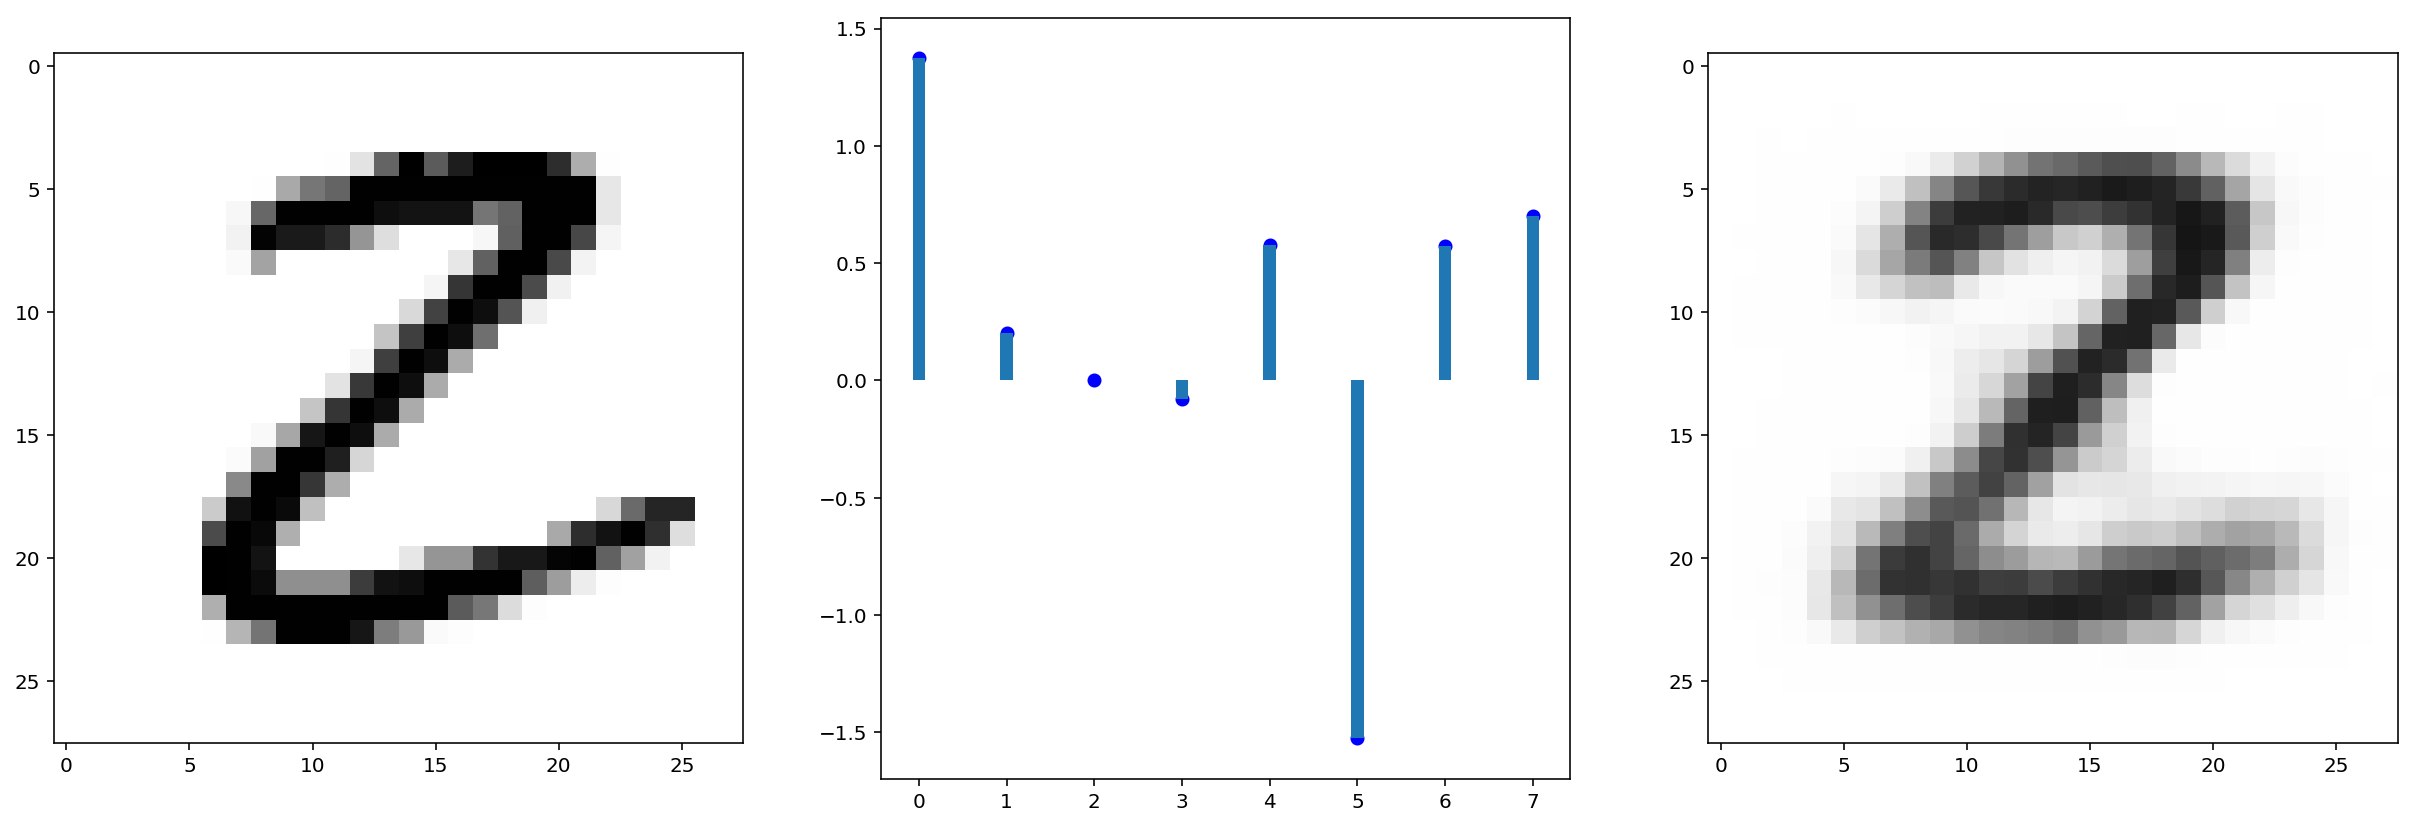

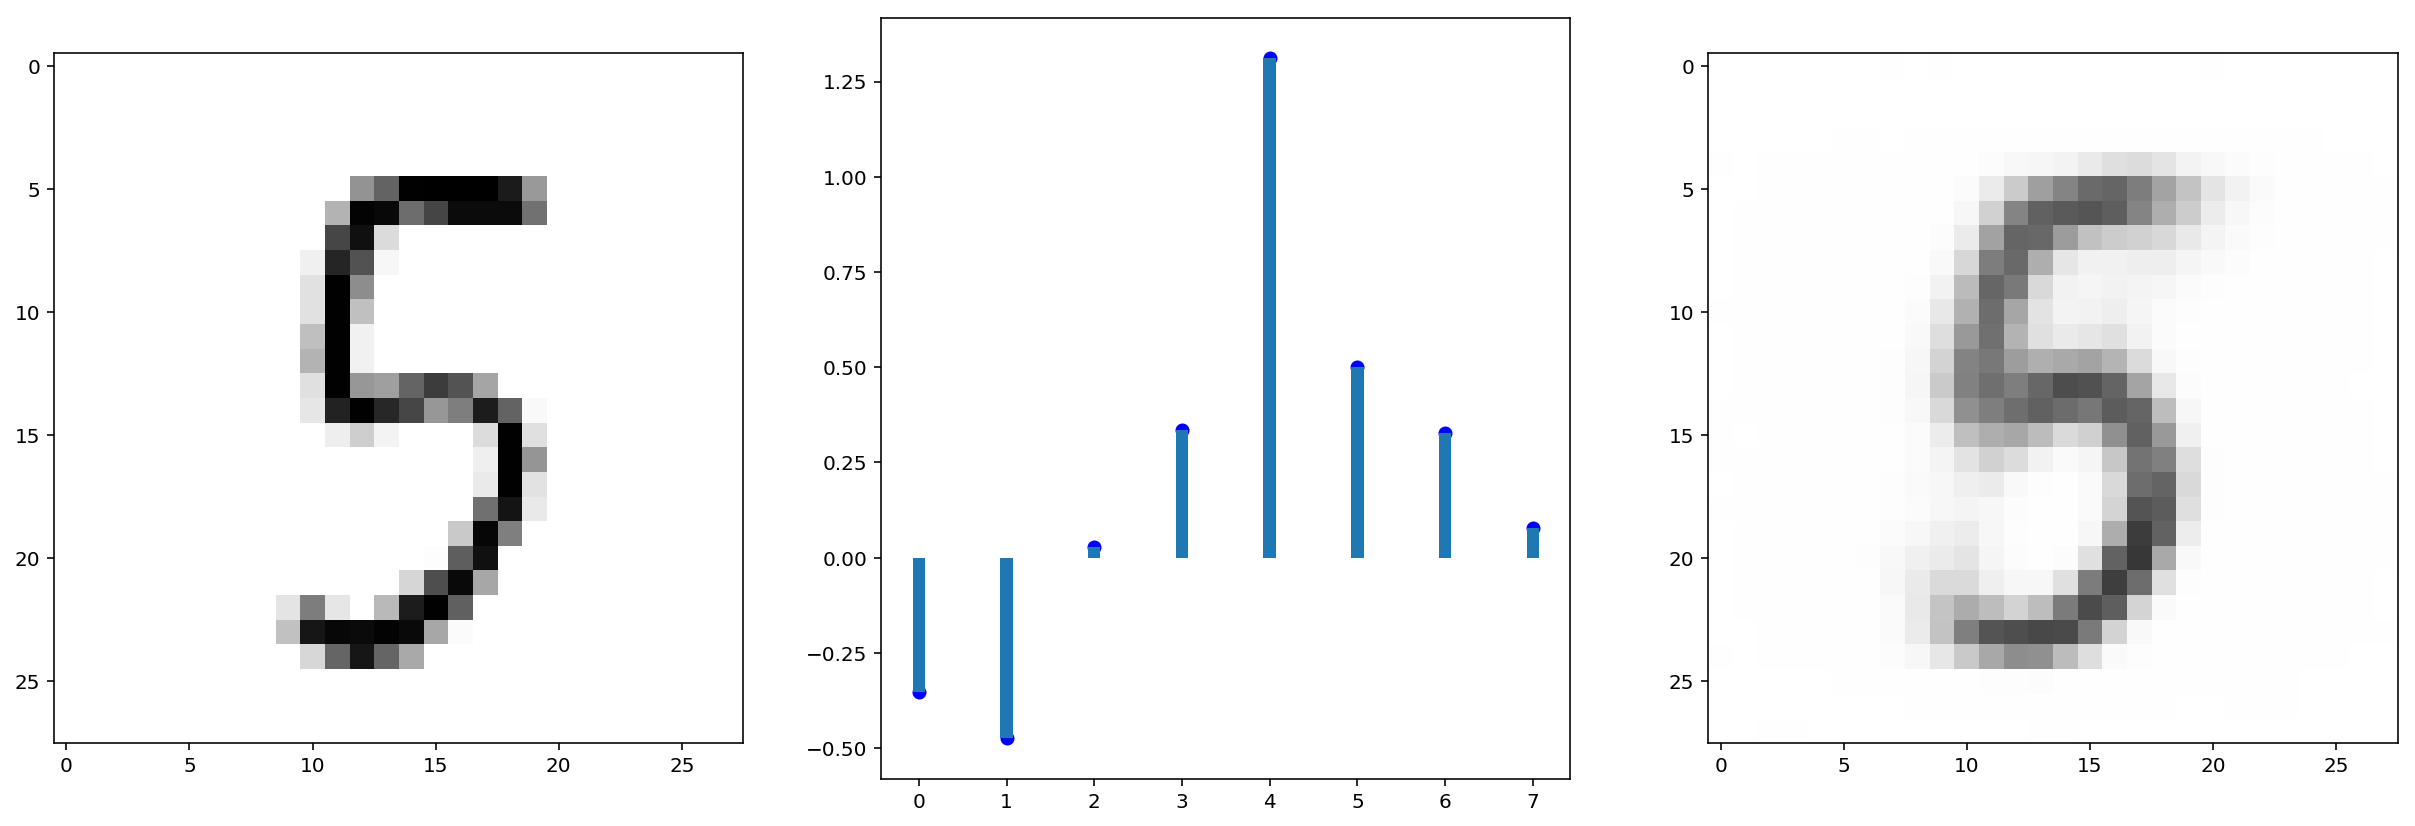

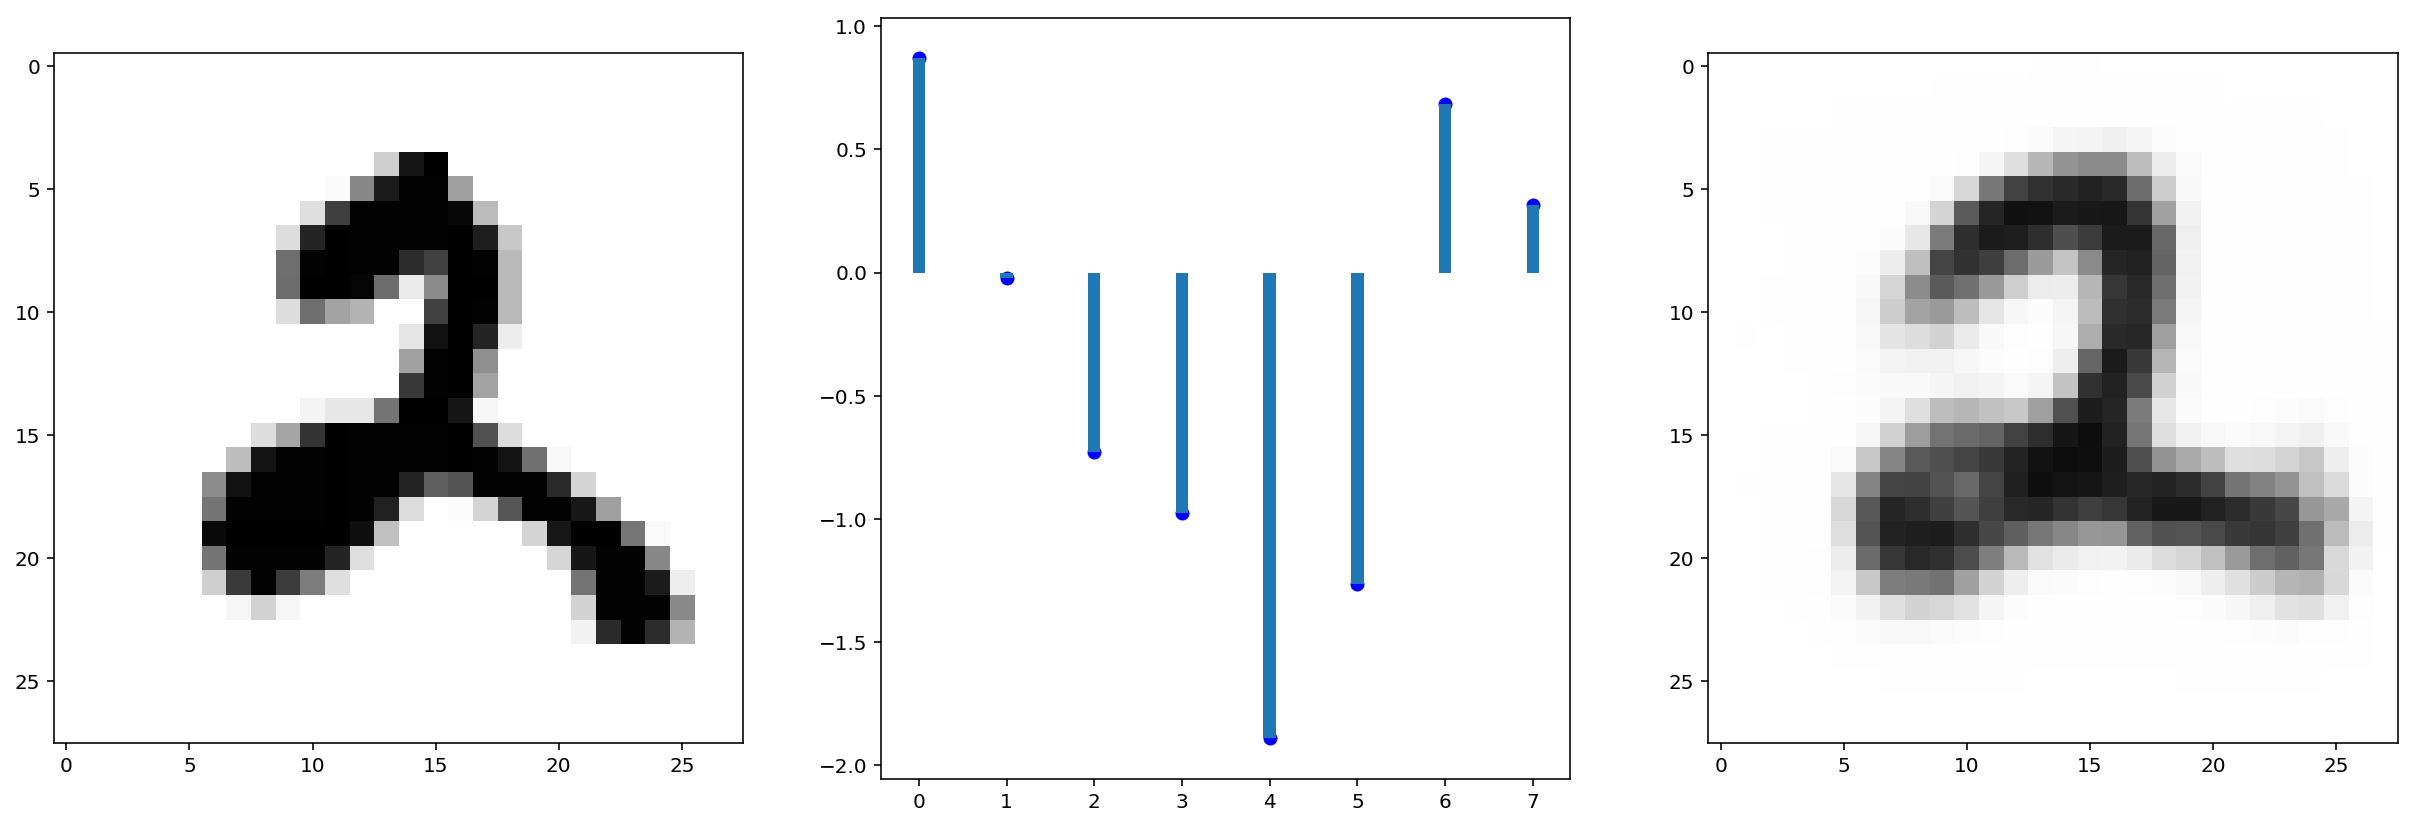

In [79]:
plot_encoding(mnist_images[15], vsc)
plot_encoding(mnist_images[20], vsc)
plot_encoding(mnist_images[25], vsc)

## mnist with normalization

In [80]:
reload_model = False

In [85]:
from src.models.vsc import VariationalSparseCoding
vsc = VariationalSparseCoding(dataset, width, height, channels, hidden_size,
                              latent_size, learning_rate, alpha, device, 
                              log_interval)

In [86]:
vsc.run_training(train_loader, test_loader, epochs, report_interval, 
                 sample_size, reload_model)

Calculating norm mean of training set
count    60000.000000
mean         9.214689
std          1.702814
min          3.569828
25%          8.022050
50%          9.200295
75%         10.363036
max         17.179047
dtype: float64
Done!

Training VSC model...
Train Epoch: 1 [0/60000 (0%)]	Loss: 557.681335
Train Epoch: 1 [16000/60000 (27%)]	Loss: 52.490891
Train Epoch: 1 [32000/60000 (53%)]	Loss: 56.469677
Train Epoch: 1 [48000/60000 (80%)]	Loss: 54.240681
====> Epoch: 1 Average loss: 56.0280
====> Test set loss: 51.3804 - VLB-VSC : 1641.5472
Train Epoch: 2 [0/60000 (0%)]	Loss: 52.225452
Train Epoch: 2 [16000/60000 (27%)]	Loss: 53.627899
Train Epoch: 2 [32000/60000 (53%)]	Loss: 50.602261
Train Epoch: 2 [48000/60000 (80%)]	Loss: 46.064926
====> Epoch: 2 Average loss: 49.5005
====> Test set loss: 48.9582 - VLB-VSC : 1564.1609
Train Epoch: 3 [0/60000 (0%)]	Loss: 50.640598
Train Epoch: 3 [16000/60000 (27%)]	Loss: 49.141174
Train Epoch: 3 [32000/60000 (53%)]	Loss: 46.335026
Train Epoch: 3 [480

In [87]:
mnist_images, _ = iter(test_loader).next()

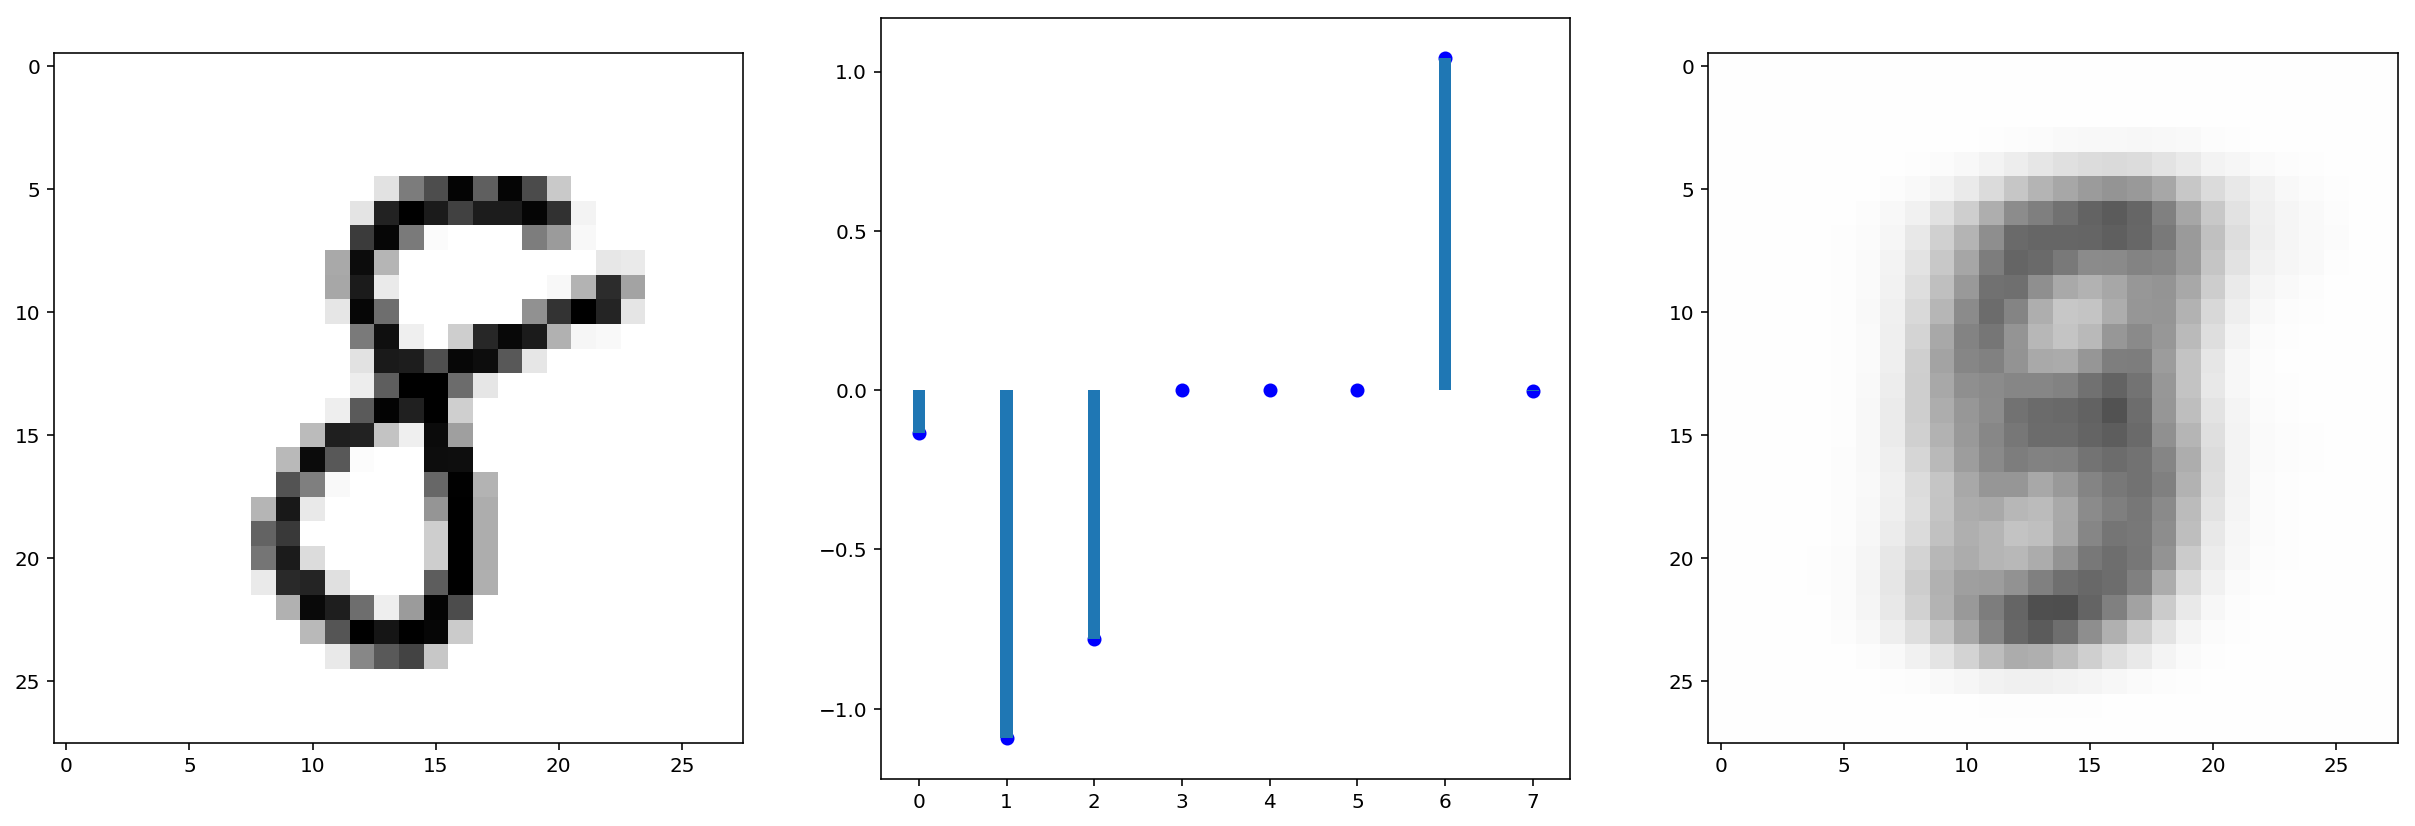

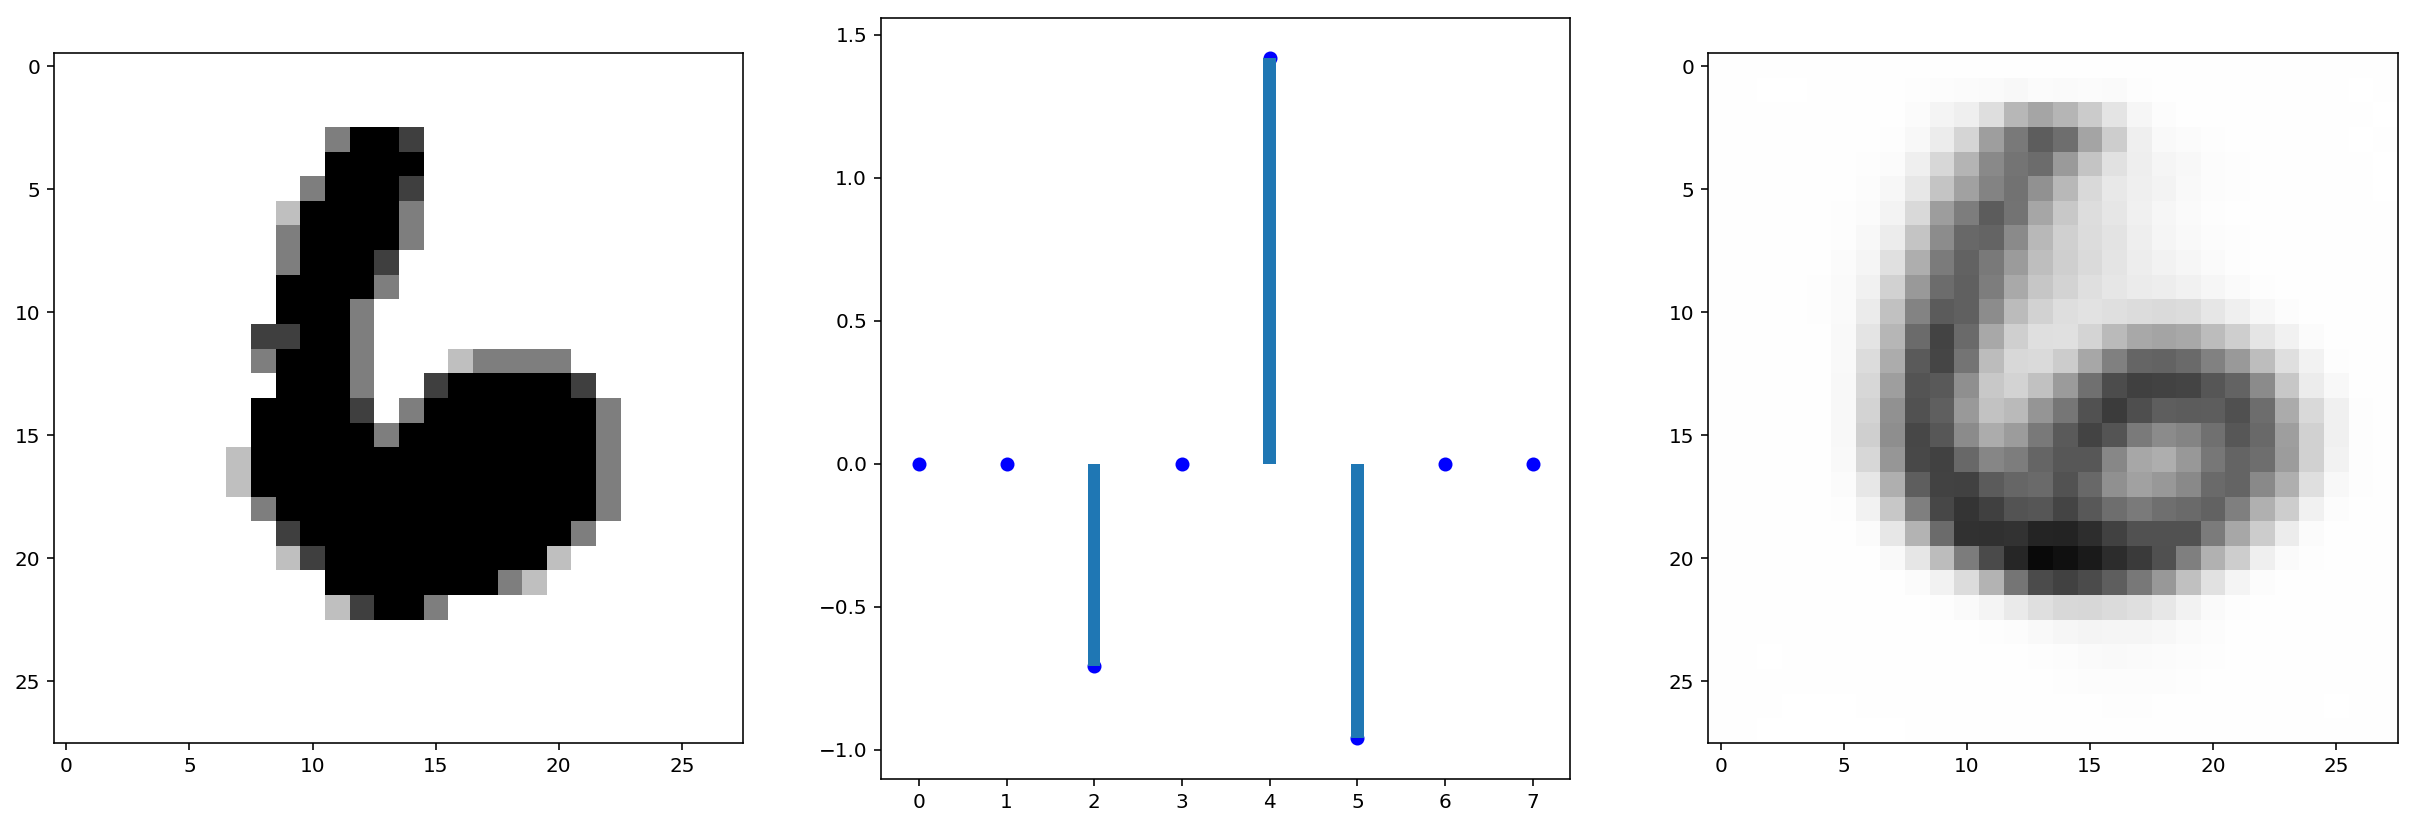

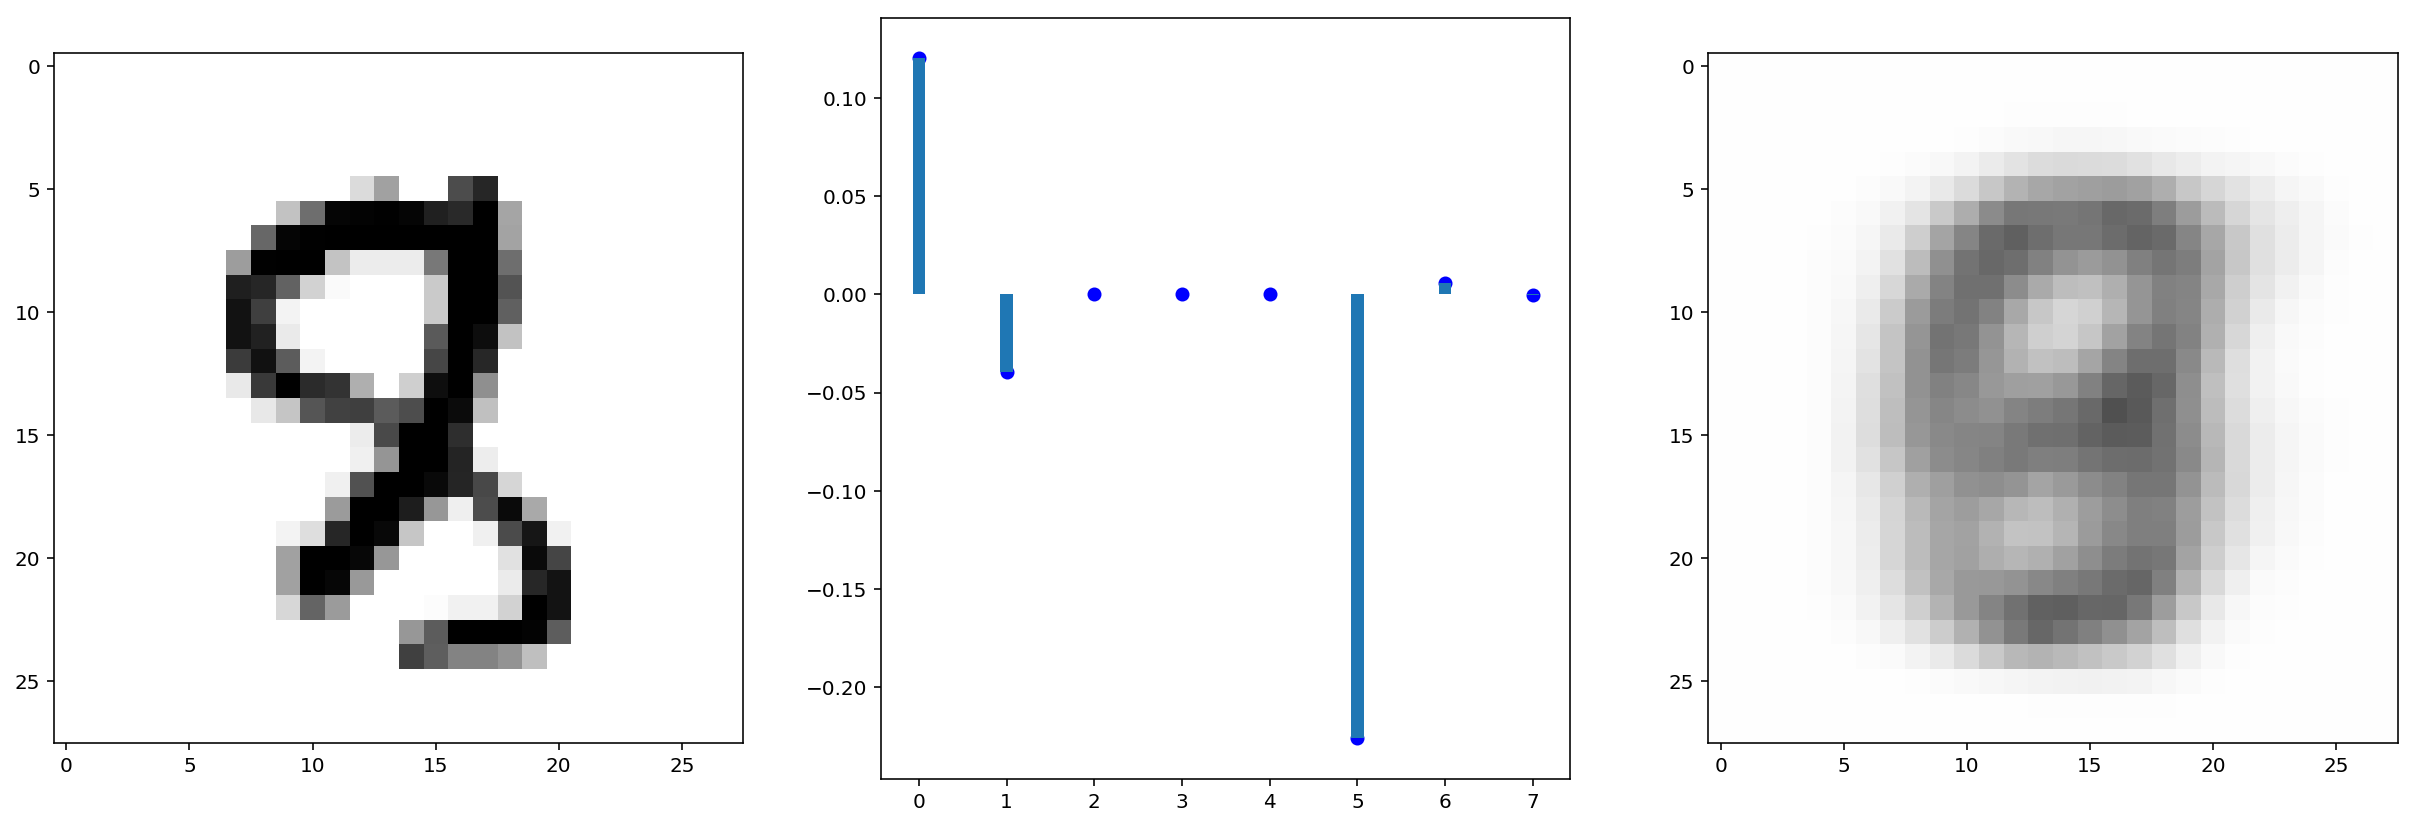

In [123]:
plot_encoding(mnist_images[15], vsc)
plot_encoding(mnist_images[20], vsc)
plot_encoding(mnist_images[25], vsc)

## CelebA

In [135]:
latent_size = 96
batch_size = 32
hidden_size = '2000,2000'
alpha = 0.5
learning_rate = 0.001
epochs = 15
dataset = 'celeba'
device = 'cuda'
log_interval = 1000
report_interval = 100
reload_model = False
sample_size = 64

In [139]:
from src.utils import get_datasets
train_loader, test_loader, (width, height, channels) = get_datasets(
    dataset, batch_size, device, root='data')

Loading celeba dataset...
Done!



In [140]:
from src.models.vsc import VariationalSparseCoding
vsc = VariationalSparseCoding(dataset, width, height, channels, hidden_size,
                              latent_size, learning_rate, alpha, device, 
                              log_interval)

In [141]:
%%time
vsc.run_training(train_loader, test_loader, epochs, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/100000 (0%)]	Loss: 2191.694580
Train Epoch: 1 [32000/100000 (32%)]	Loss: 1755.539062
Train Epoch: 1 [64000/100000 (64%)]	Loss: 1729.438110
Train Epoch: 1 [96000/100000 (96%)]	Loss: 1770.367554
====> Epoch: 1 Average loss: 1772.3567
====> Test set loss: 1727.5194 - VLB-VSC : 55280.6216
Train Epoch: 2 [0/100000 (0%)]	Loss: 1626.487915
Train Epoch: 2 [32000/100000 (32%)]	Loss: 1691.464111
Train Epoch: 2 [64000/100000 (64%)]	Loss: 1701.422485
Train Epoch: 2 [96000/100000 (96%)]	Loss: 1714.778076
====> Epoch: 2 Average loss: 1716.7026
====> Test set loss: 1709.3440 - VLB-VSC : 54699.0094
Train Epoch: 3 [0/100000 (0%)]	Loss: 1681.889893
Train Epoch: 3 [32000/100000 (32%)]	Loss: 1704.598877
Train Epoch: 3 [64000/100000 (64%)]	Loss: 1737.668701
Train Epoch: 3 [96000/100000 (96%)]	Loss: 1709.917603
====> Epoch: 3 Average loss: 1701.2388
====> Test set loss: 1698.8248 - VLB-VSC : 54362.3926
Train Epoch: 4 [0/100000 (0%)]	Loss: 1689.780640
Train Epoch: 4 [3

In [142]:
images, _ = iter(test_loader).next()

In [147]:
images[15][None,:].shape

torch.Size([1, 3, 32, 32])

In [145]:
3 * 32 *32

3072

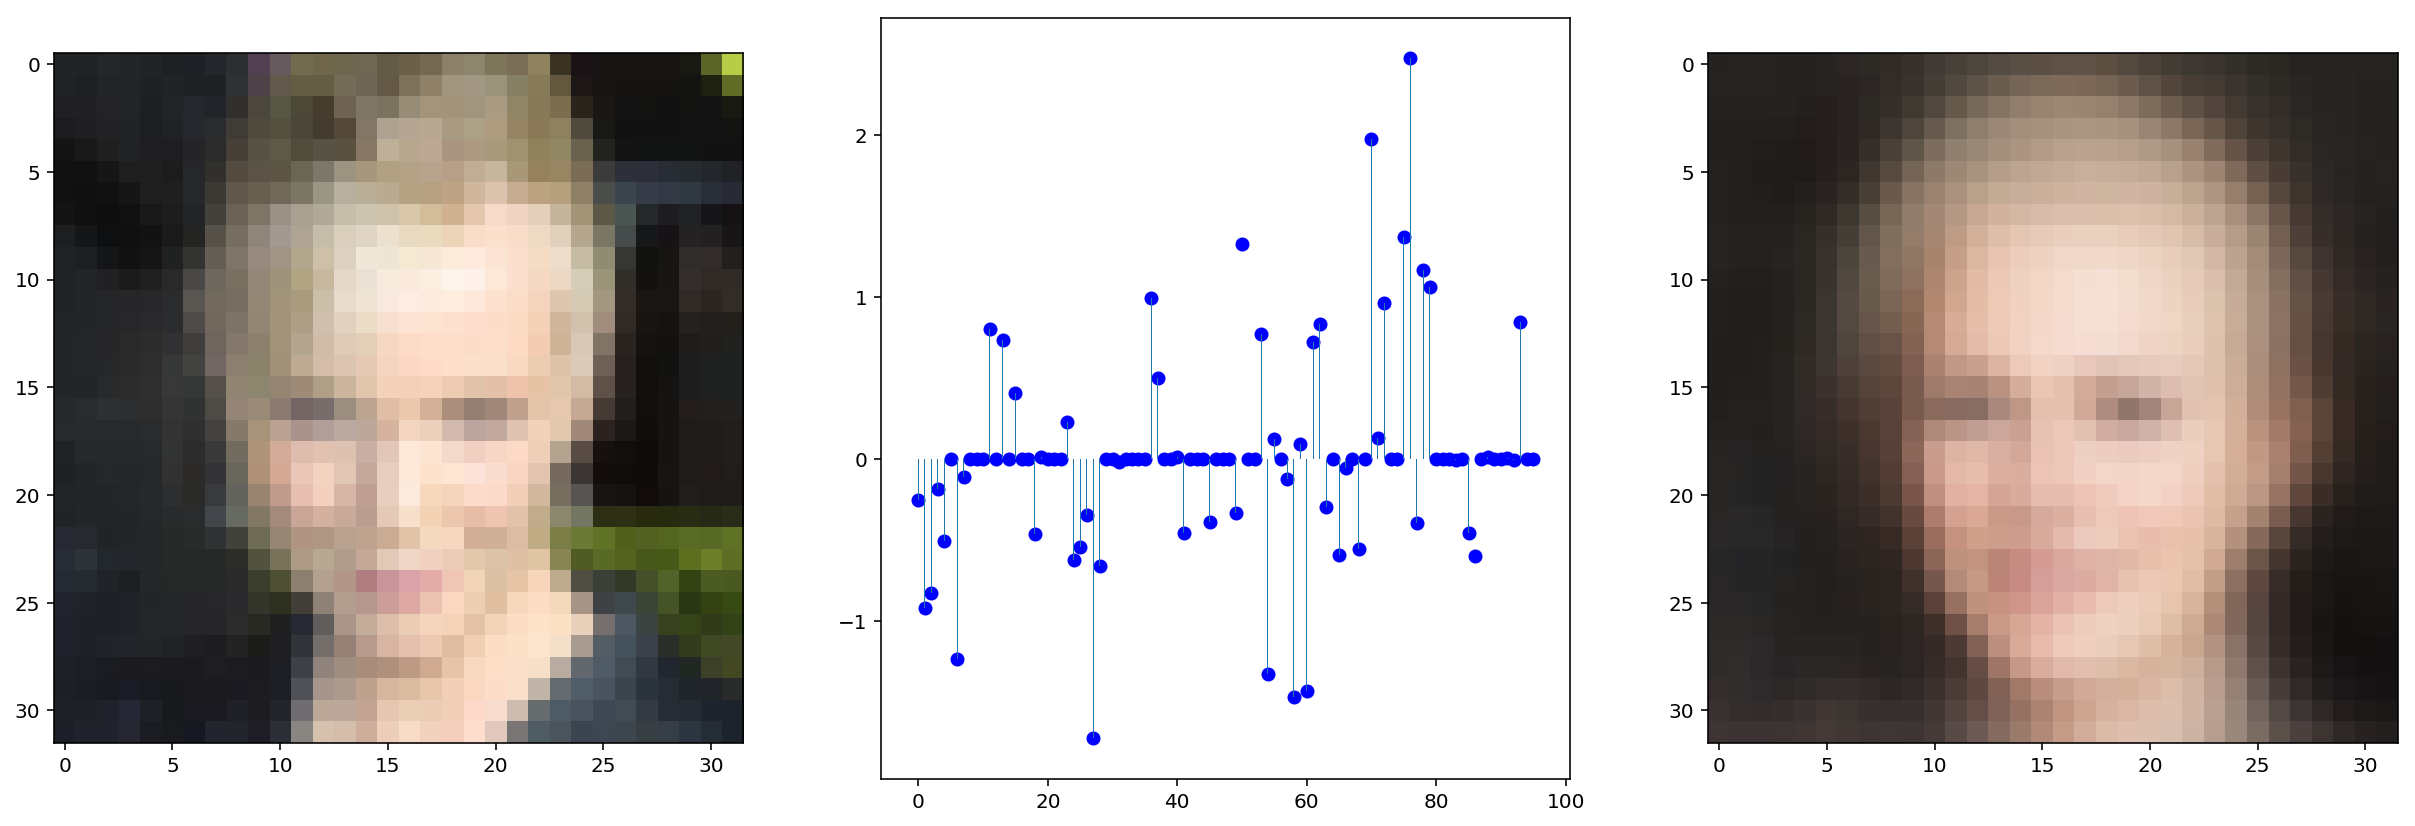

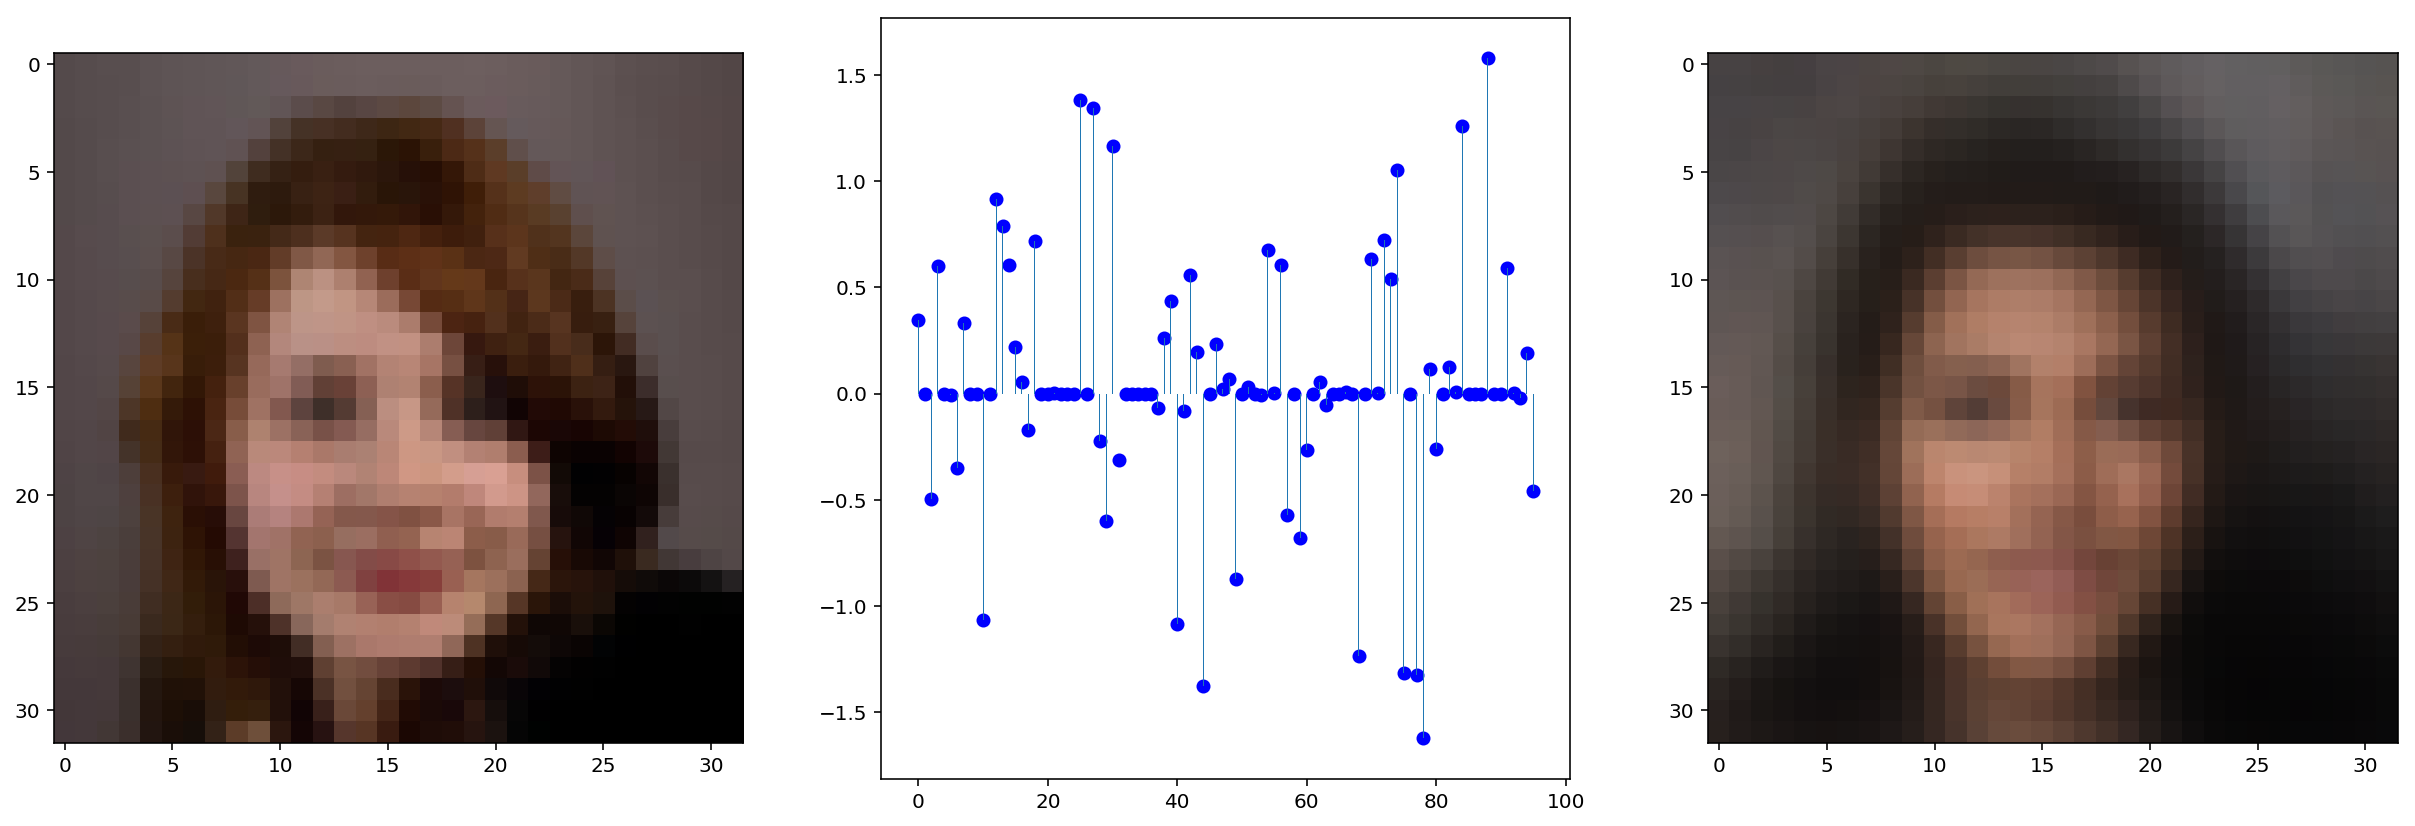

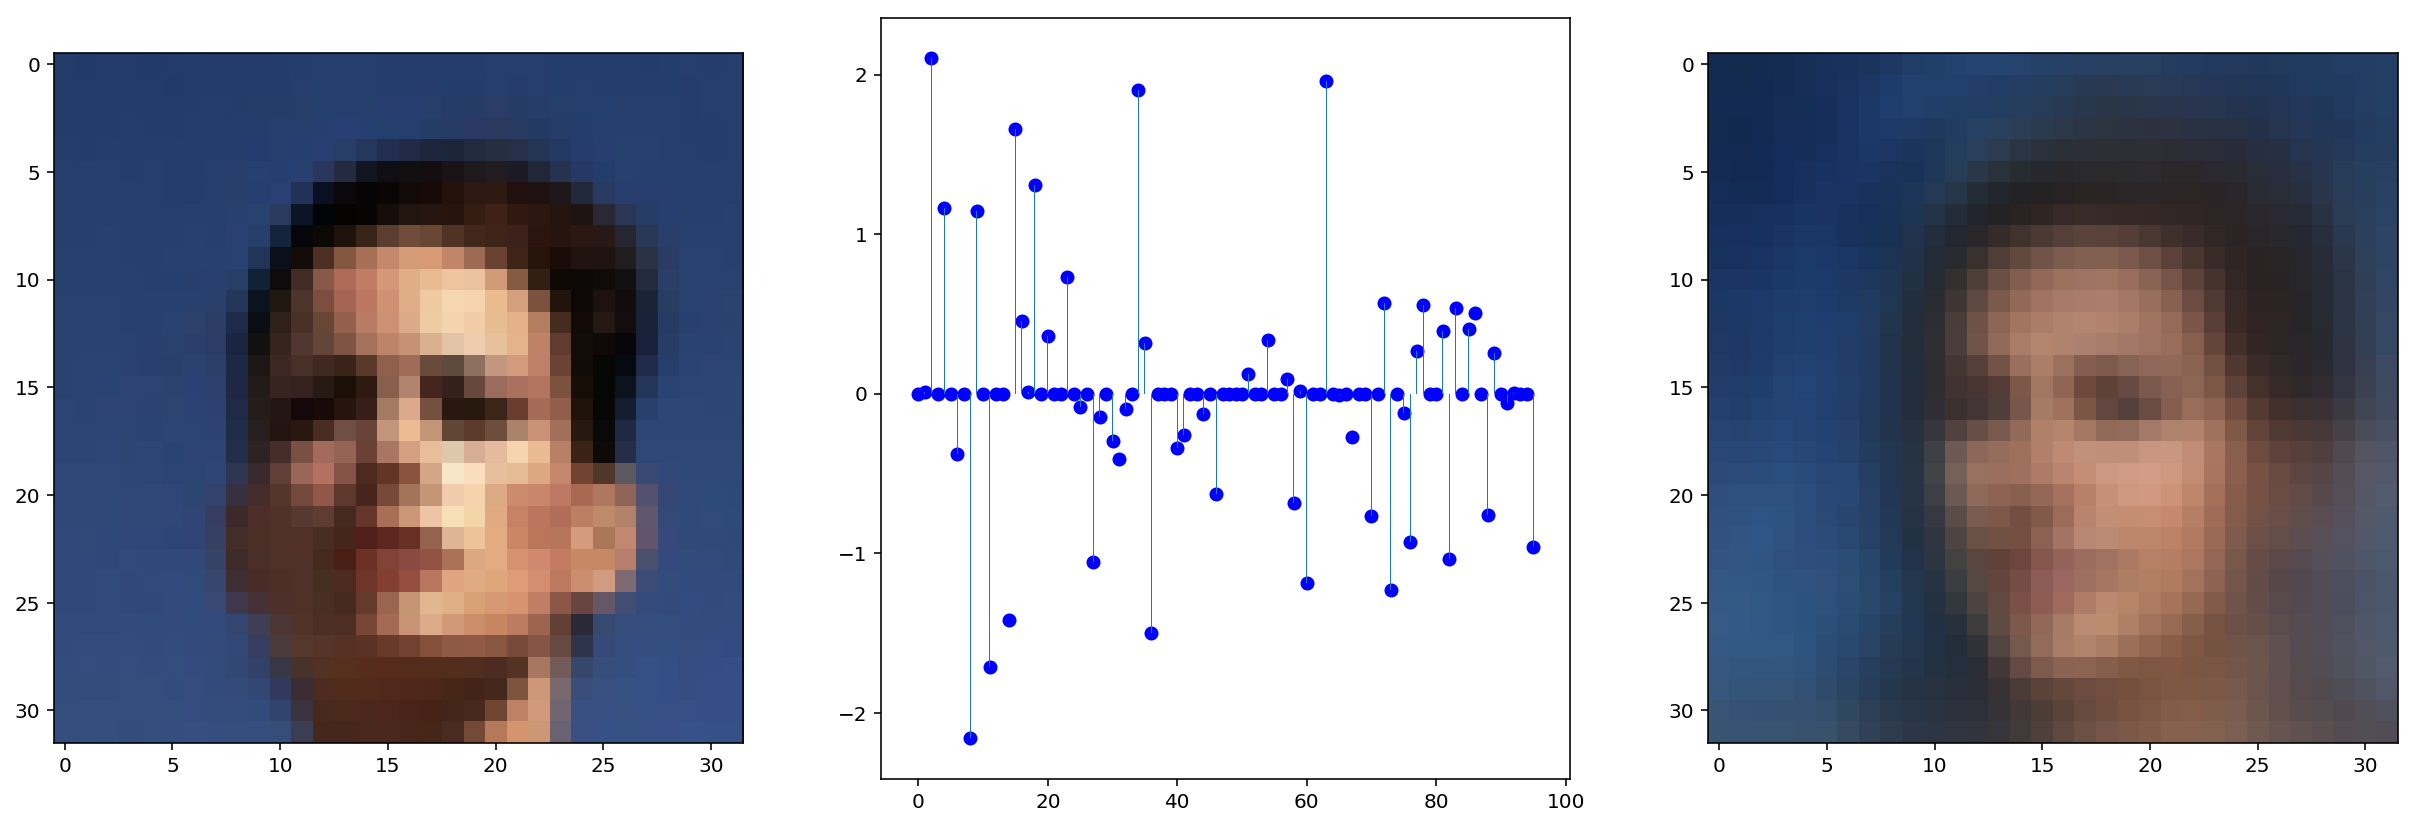

In [152]:
plot_encoding(images[15][None,:], vsc, negative=False)
plot_encoding(images[20][None,:], vsc, negative=False)
plot_encoding(images[25][None,:], vsc, negative=False)

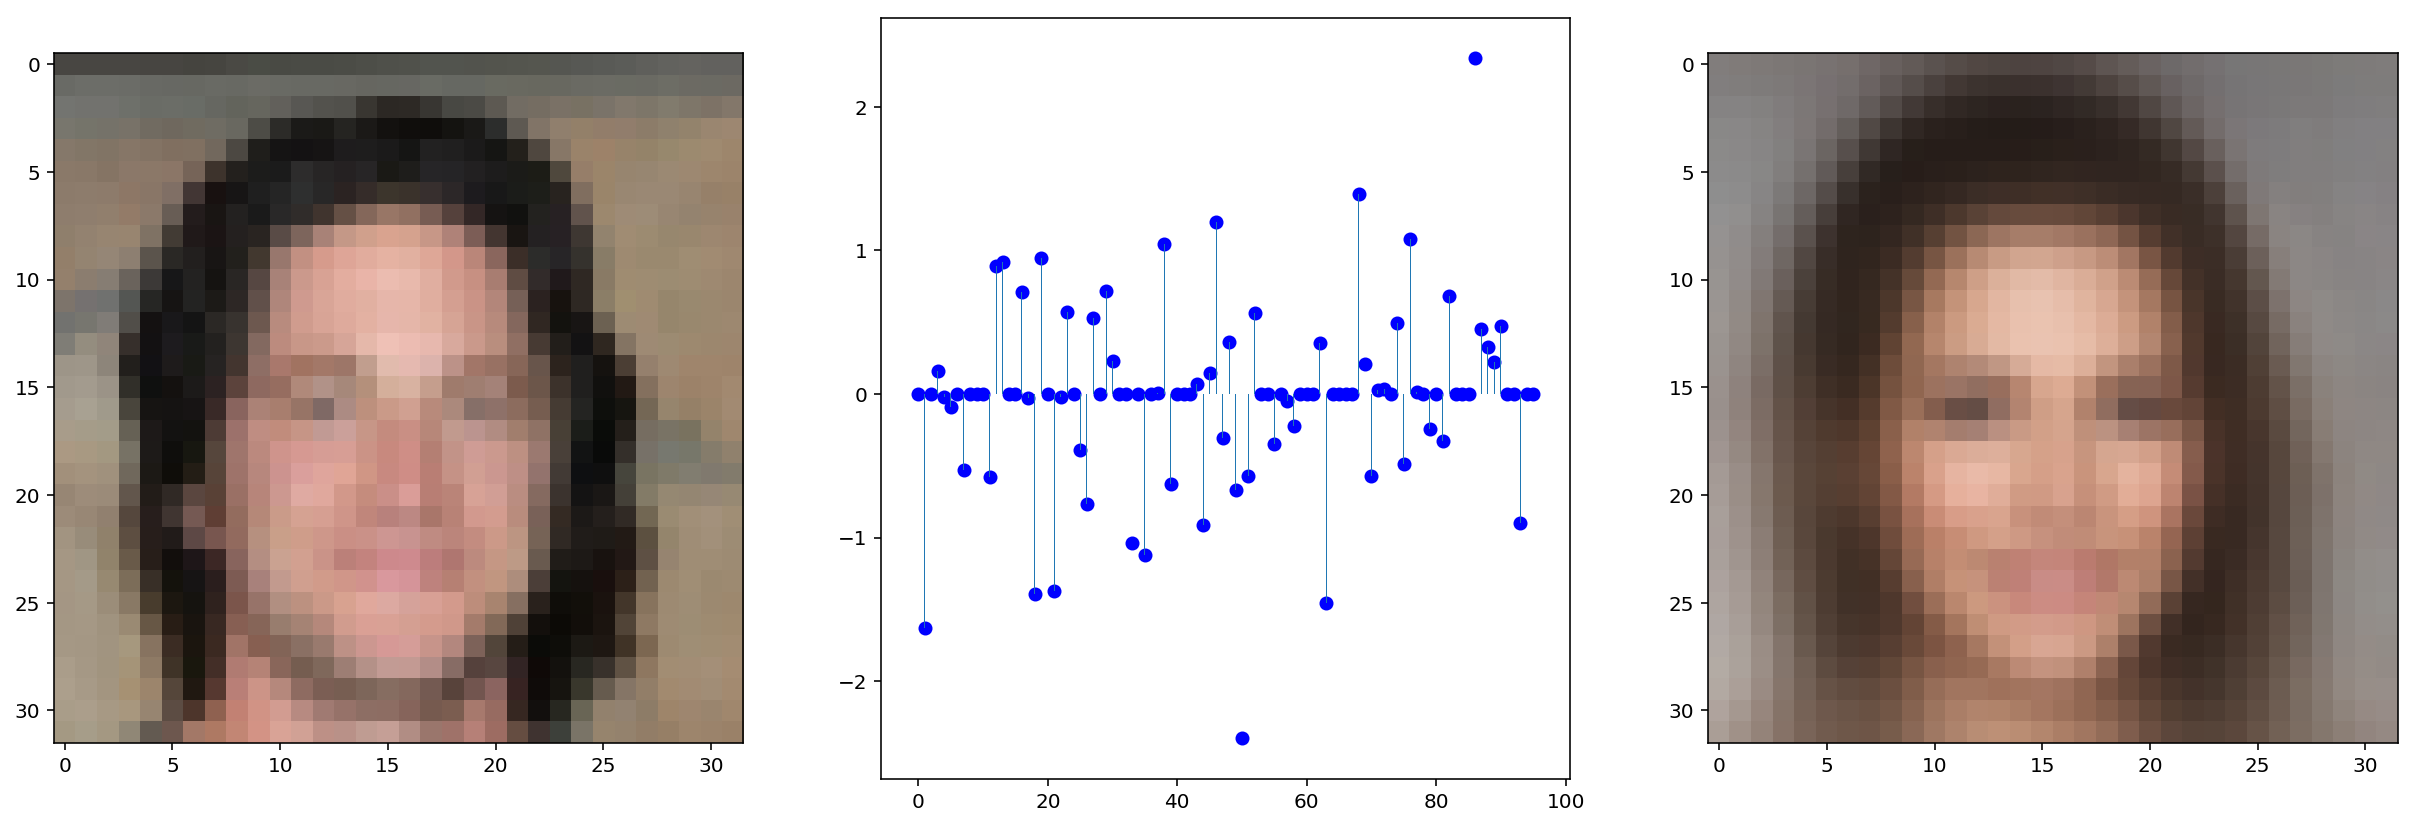

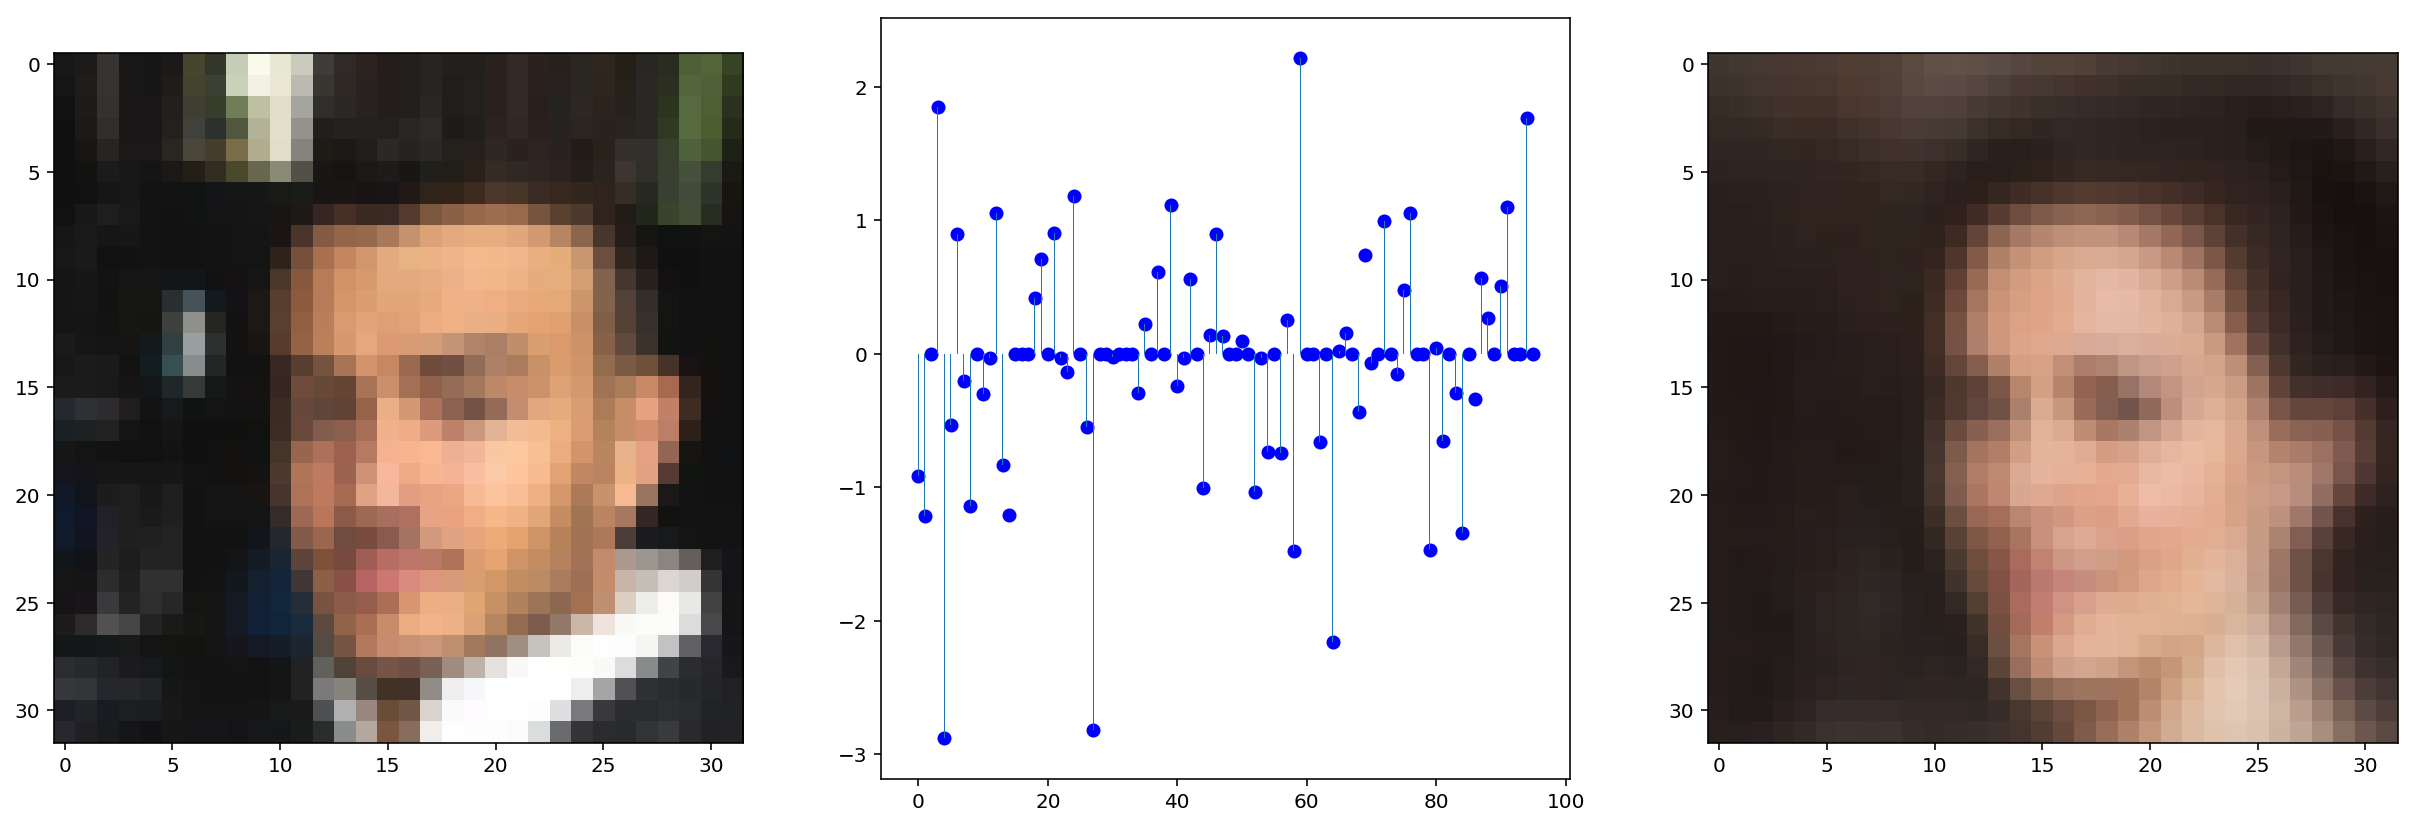

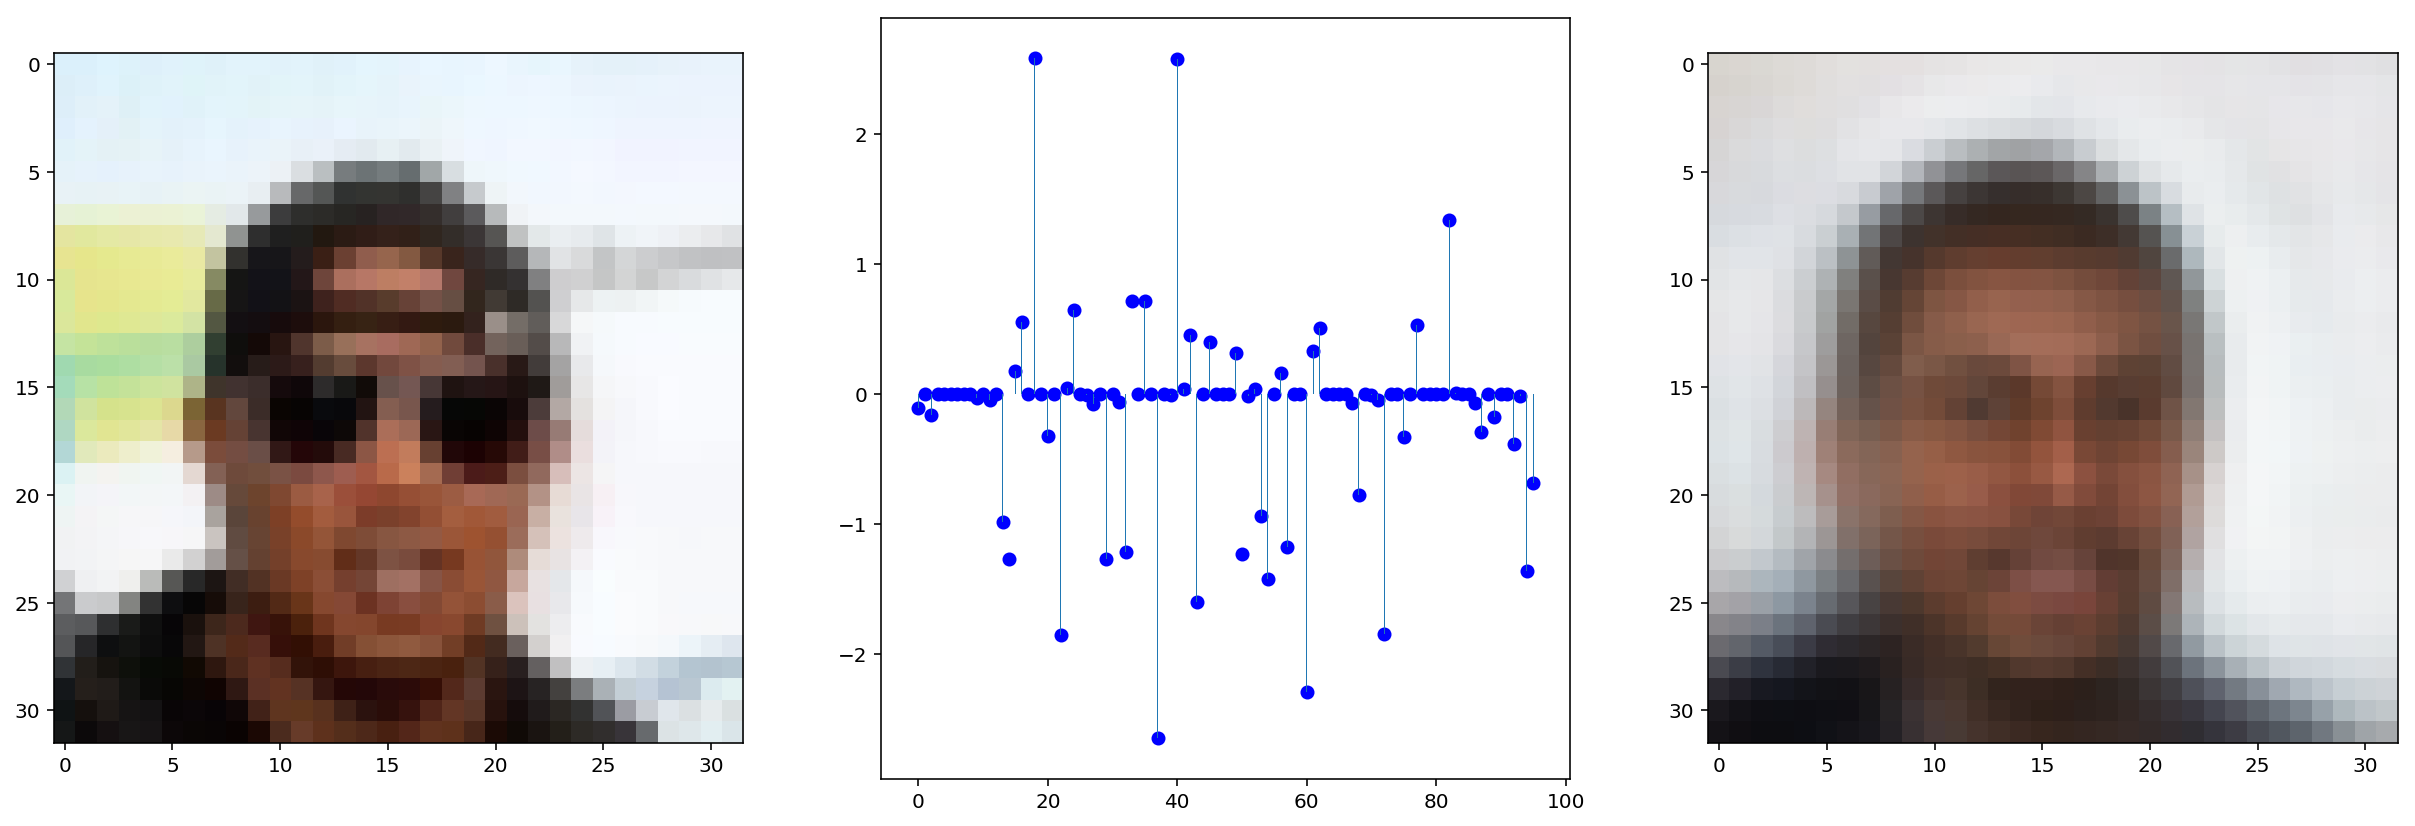

In [153]:
plot_encoding(images[3][None,:], vsc, negative=False)
plot_encoding(images[13][None,:], vsc, negative=False)
plot_encoding(images[31][None,:], vsc, negative=False)

## CelebA - 800 latent dimensions

In [154]:
latent_size = 800
batch_size = 32
hidden_size = '2000,2000'
alpha = 0.5
learning_rate = 0.001
epochs = 15
dataset = 'celeba'
device = 'cuda'
log_interval = 4000
report_interval = 100
reload_model = False
sample_size = 64

In [155]:
from src.utils import get_datasets
train_loader, test_loader, (width, height, channels) = get_datasets(
    dataset, batch_size, device, root='data')

Loading celeba dataset...
Done!



In [156]:
from src.models.vsc import VariationalSparseCoding
vsc = VariationalSparseCoding(dataset, width, height, channels, hidden_size,
                              latent_size, learning_rate, alpha, device, 
                              log_interval)

In [157]:
%%time
vsc.run_training(train_loader, test_loader, epochs, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/100000 (0%)]	Loss: 2622.828613
Train Epoch: 1 [32000/100000 (32%)]	Loss: 1781.147461
Train Epoch: 1 [64000/100000 (64%)]	Loss: 1808.082642
Train Epoch: 1 [96000/100000 (96%)]	Loss: 1812.760986
====> Epoch: 1 Average loss: 1806.2896
====> Test set loss: 1765.7263 - VLB-VSC : 56503.2418
Train Epoch: 2 [0/100000 (0%)]	Loss: 1783.825317
Train Epoch: 2 [32000/100000 (32%)]	Loss: 1848.353760
Train Epoch: 2 [64000/100000 (64%)]	Loss: 1704.068726
Train Epoch: 2 [96000/100000 (96%)]	Loss: 1723.888062
====> Epoch: 2 Average loss: 1756.6628
====> Test set loss: 1743.5229 - VLB-VSC : 55792.7316
Train Epoch: 3 [0/100000 (0%)]	Loss: 1763.542236
Train Epoch: 3 [32000/100000 (32%)]	Loss: 1721.889526
Train Epoch: 3 [64000/100000 (64%)]	Loss: 1735.633667
Train Epoch: 3 [96000/100000 (96%)]	Loss: 1646.133179
====> Epoch: 3 Average loss: 1741.6536
====> Test set loss: 1740.1135 - VLB-VSC : 55683.6327
Train Epoch: 4 [0/100000 (0%)]	Loss: 1767.783691
Train Epoch: 4 [3

In [158]:
images, _ = iter(test_loader).next()

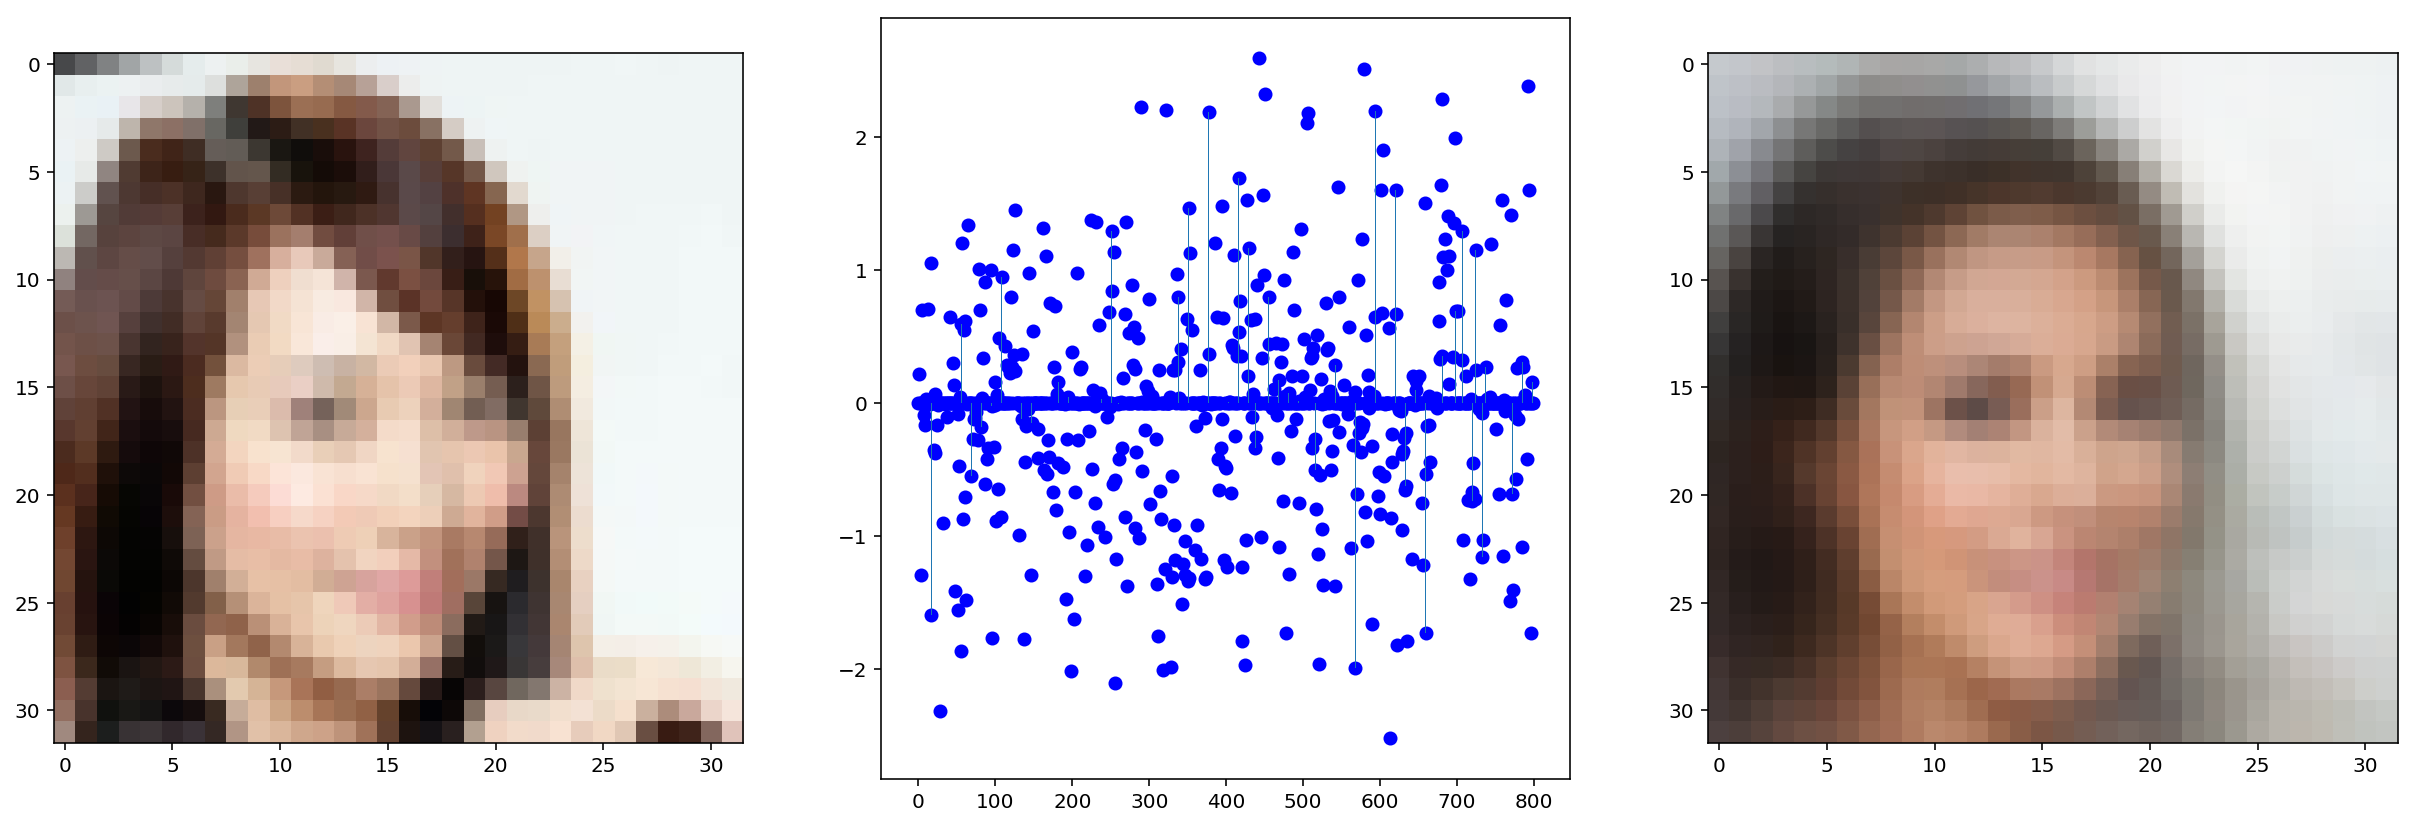

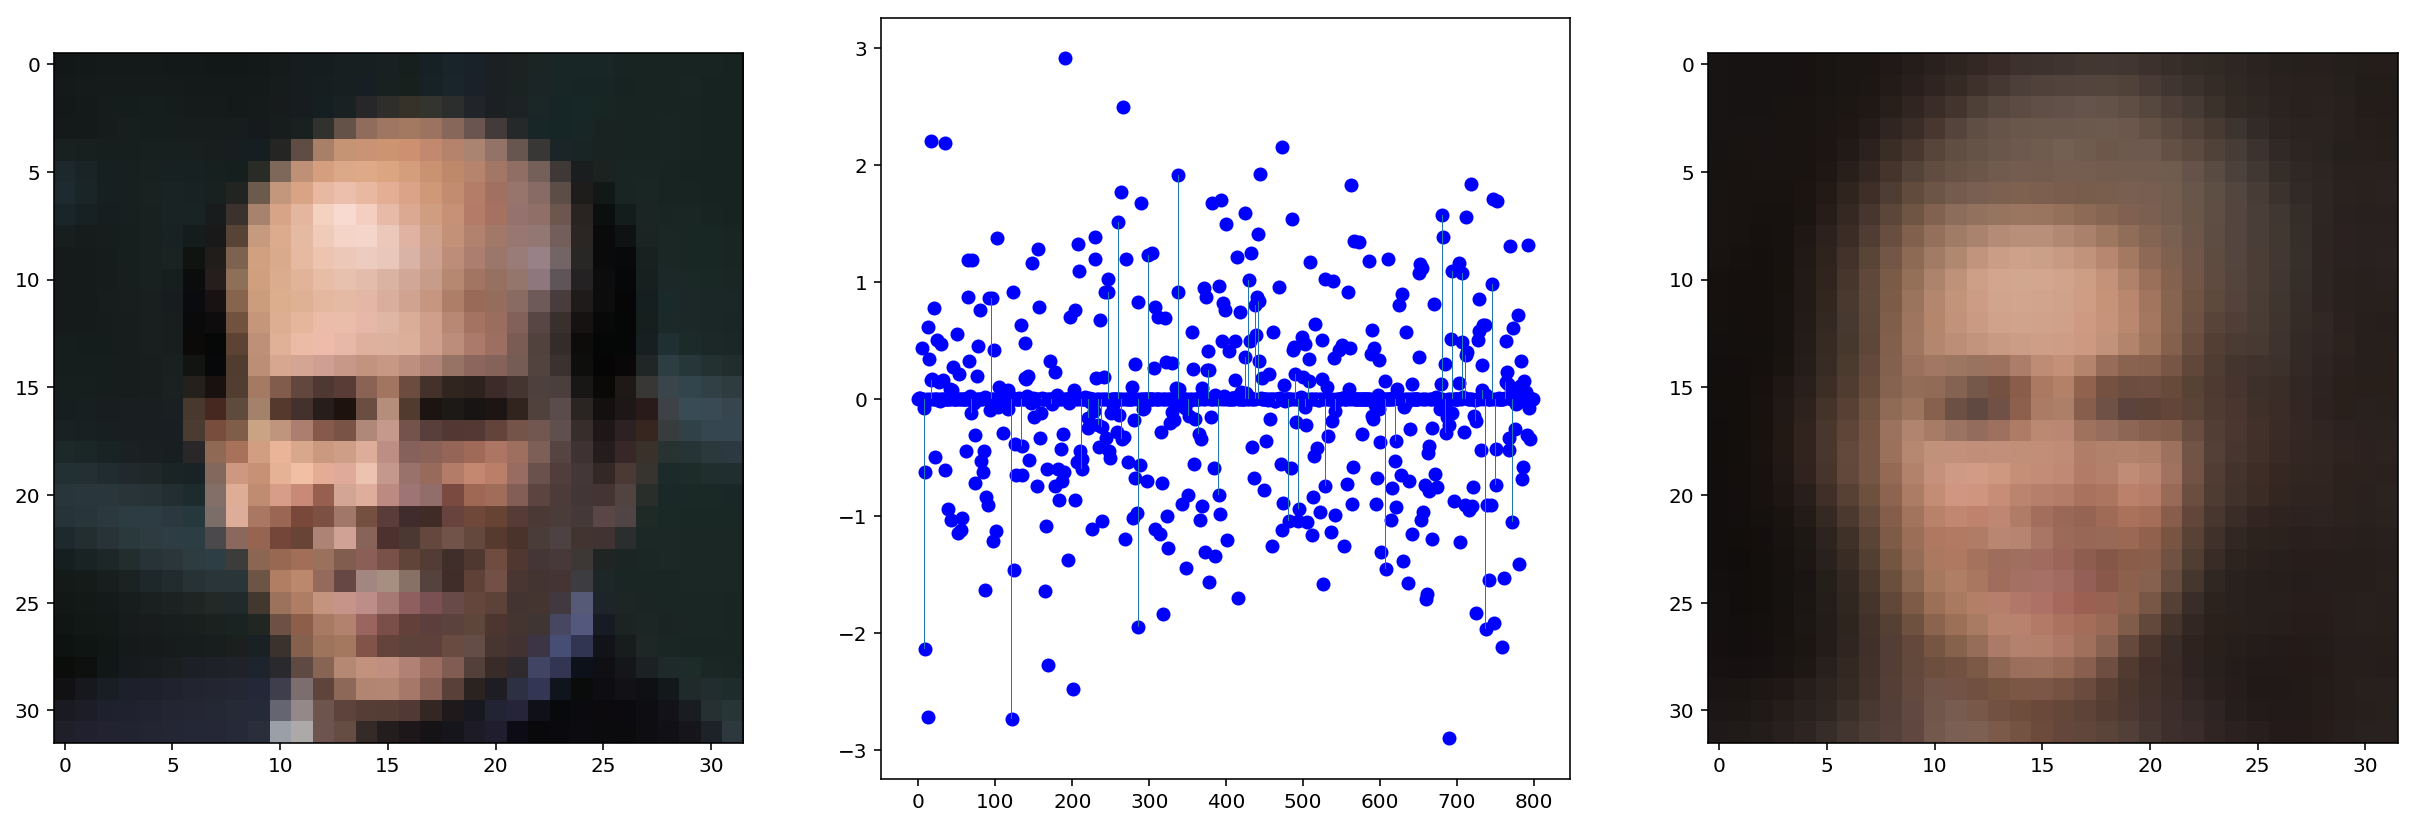

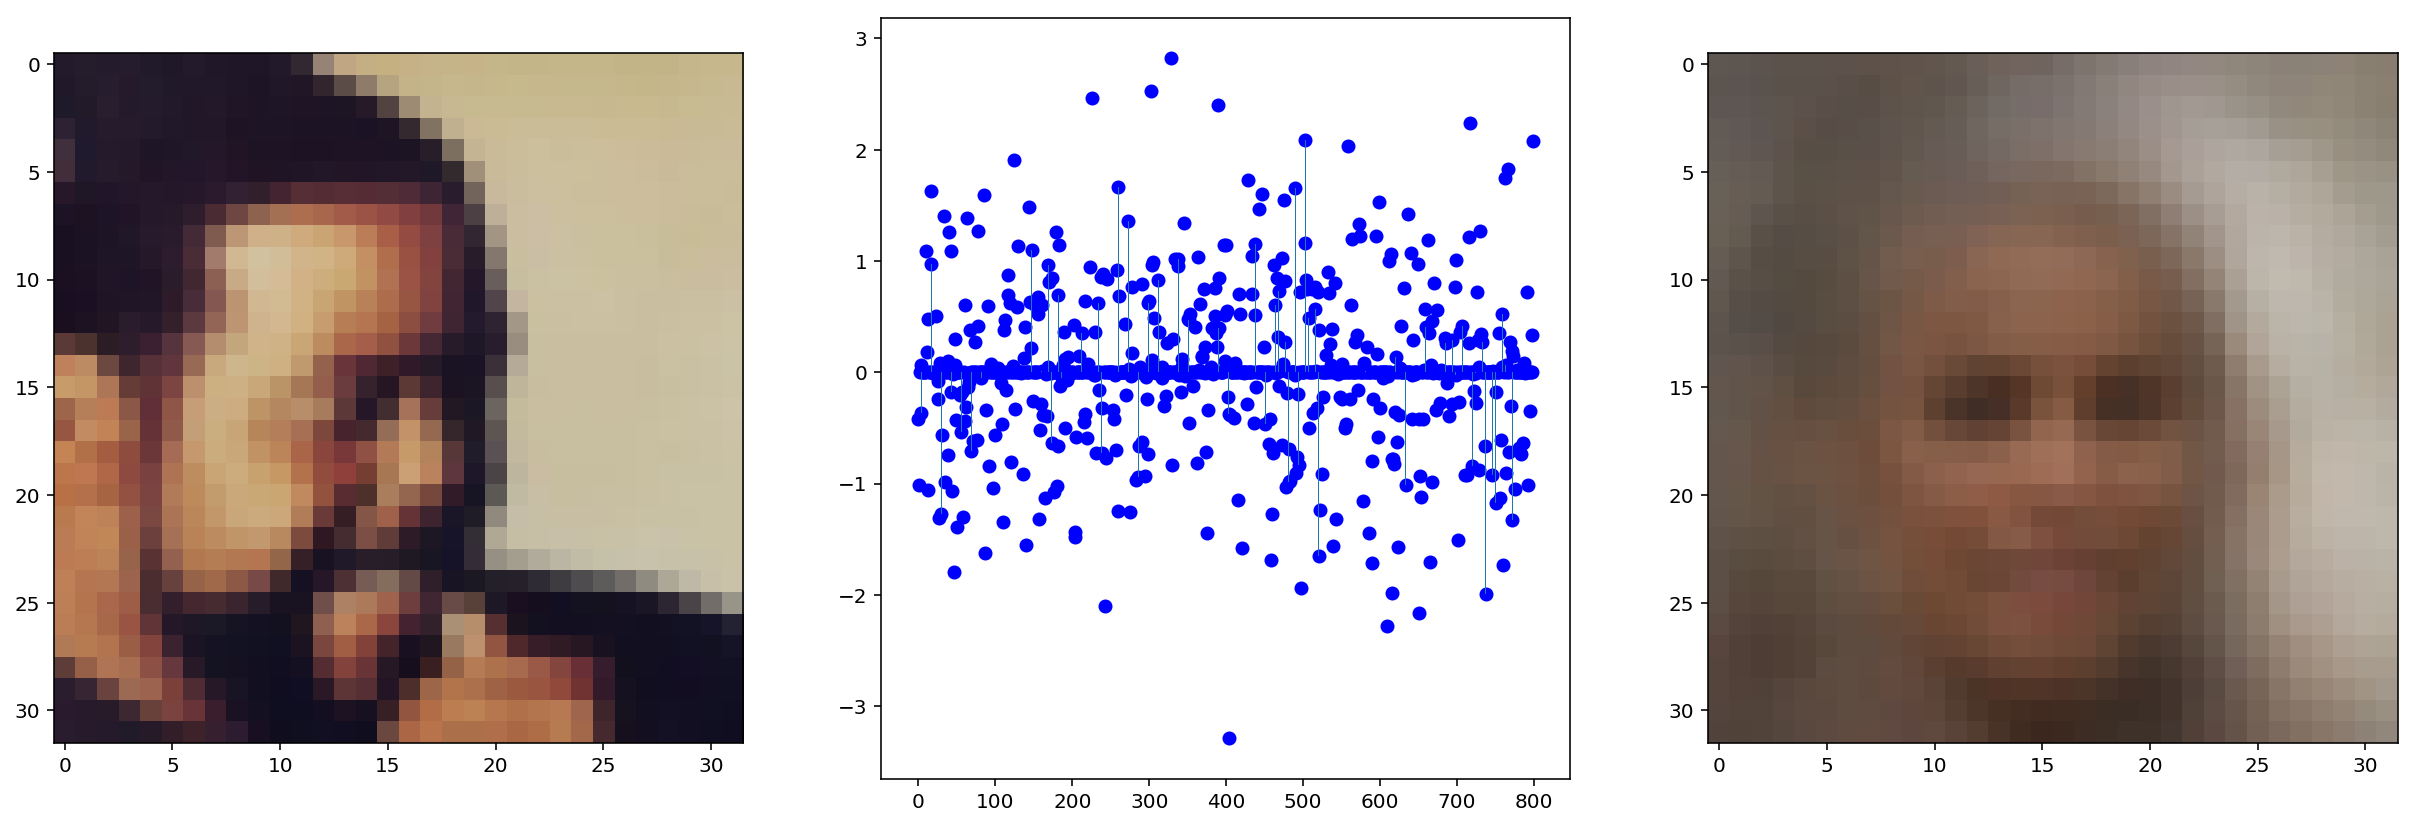

In [159]:
plot_encoding(images[15][None,:], vsc, negative=False)
plot_encoding(images[20][None,:], vsc, negative=False)
plot_encoding(images[25][None,:], vsc, negative=False)

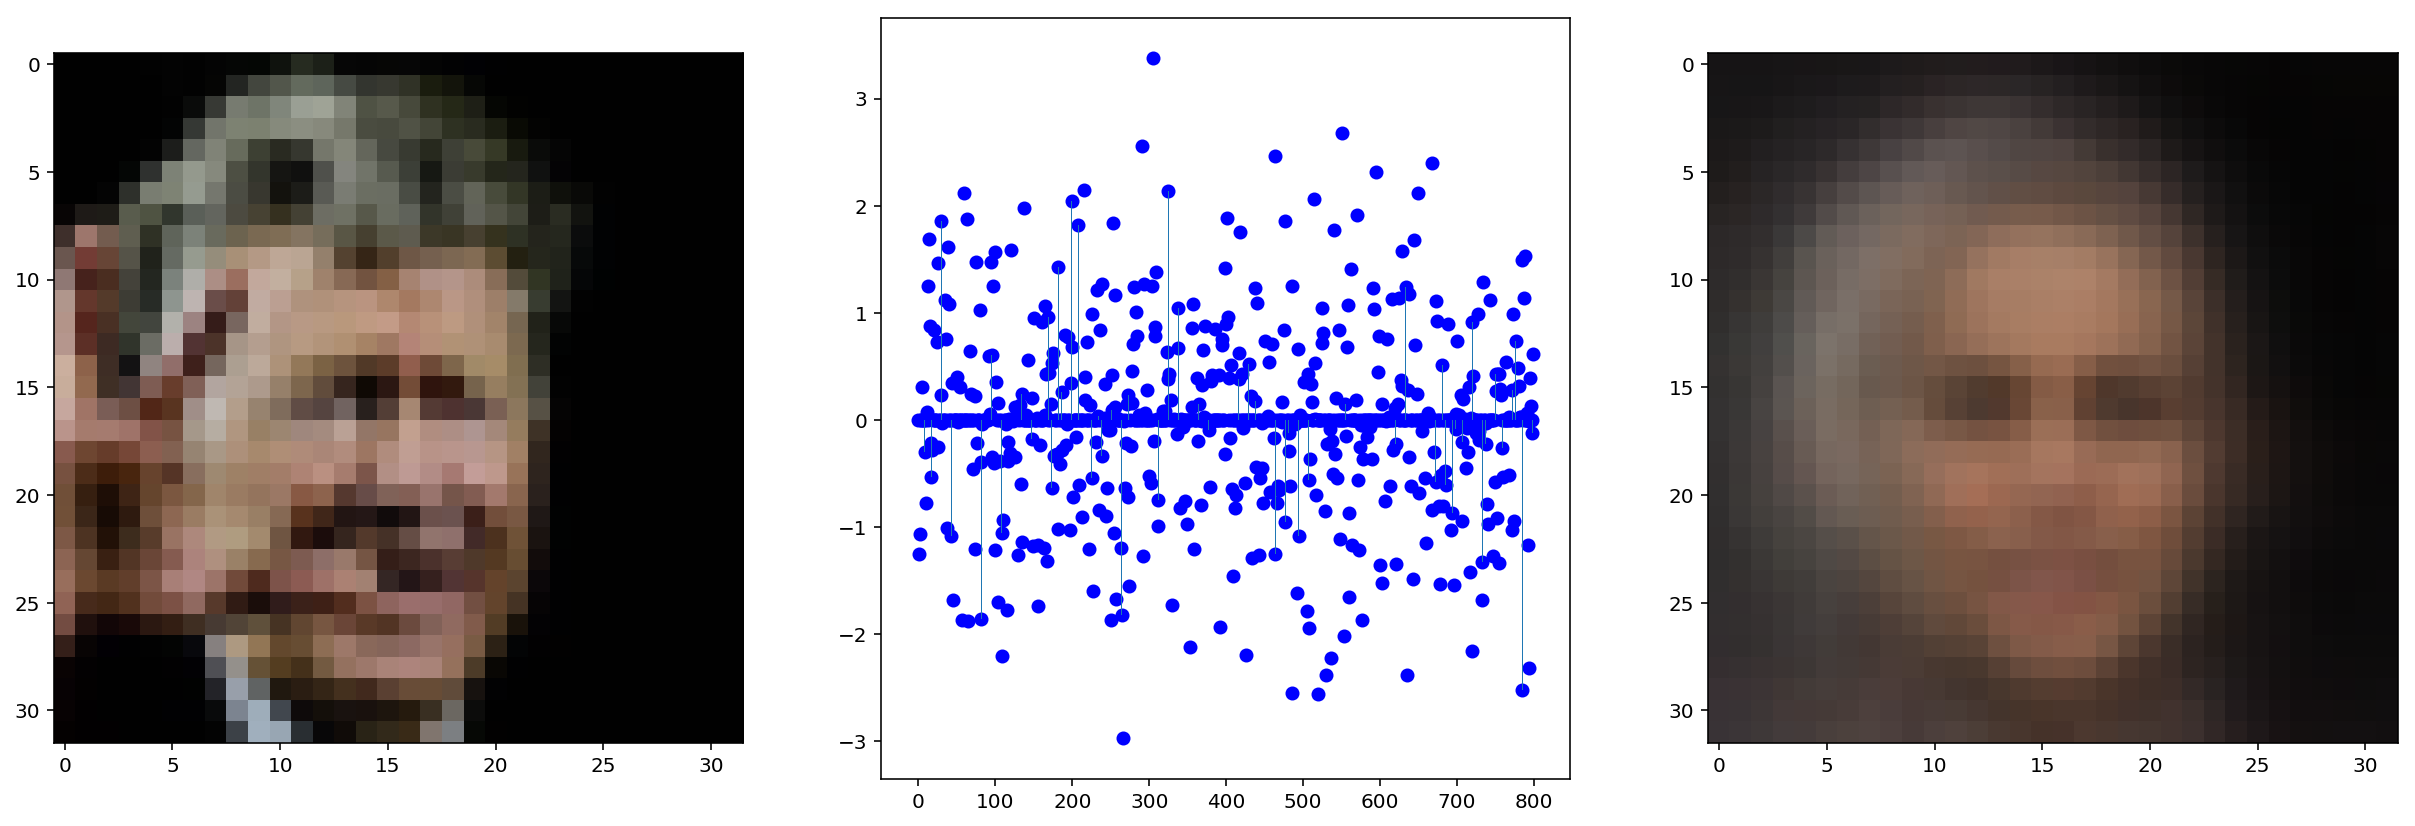

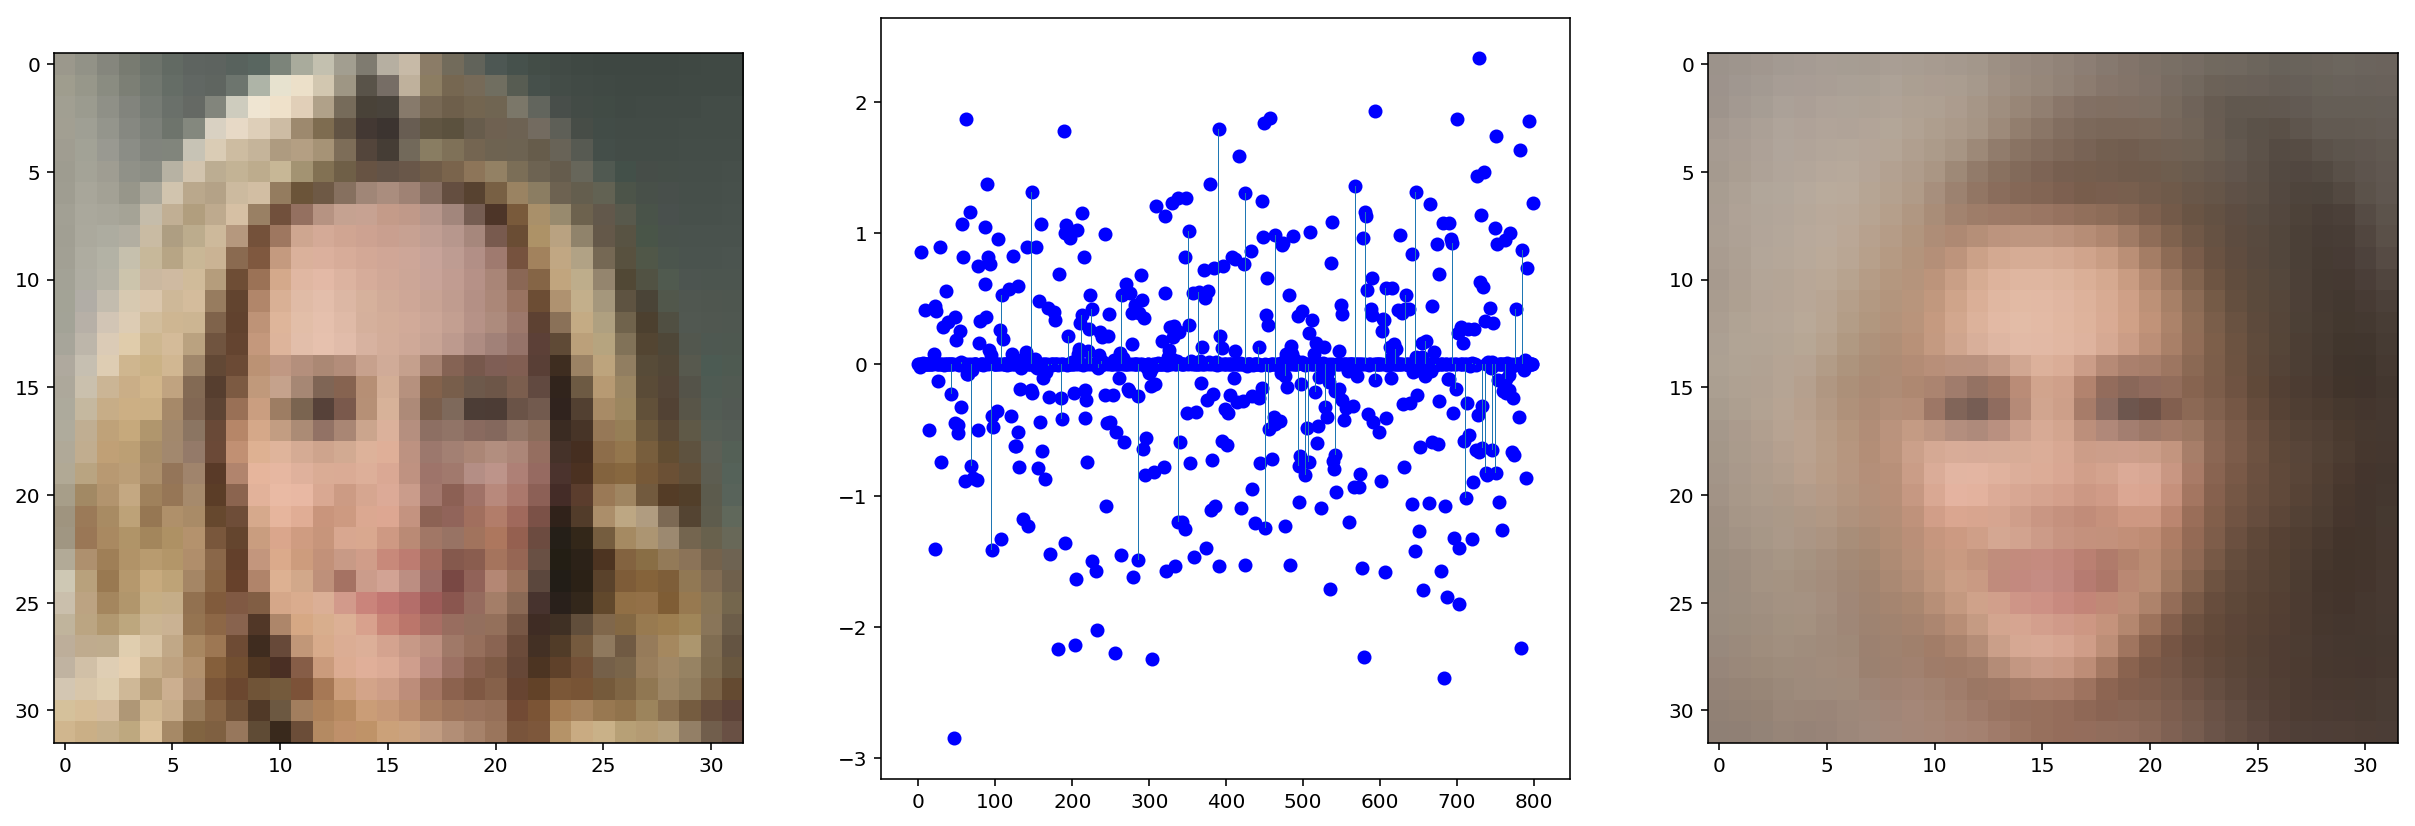

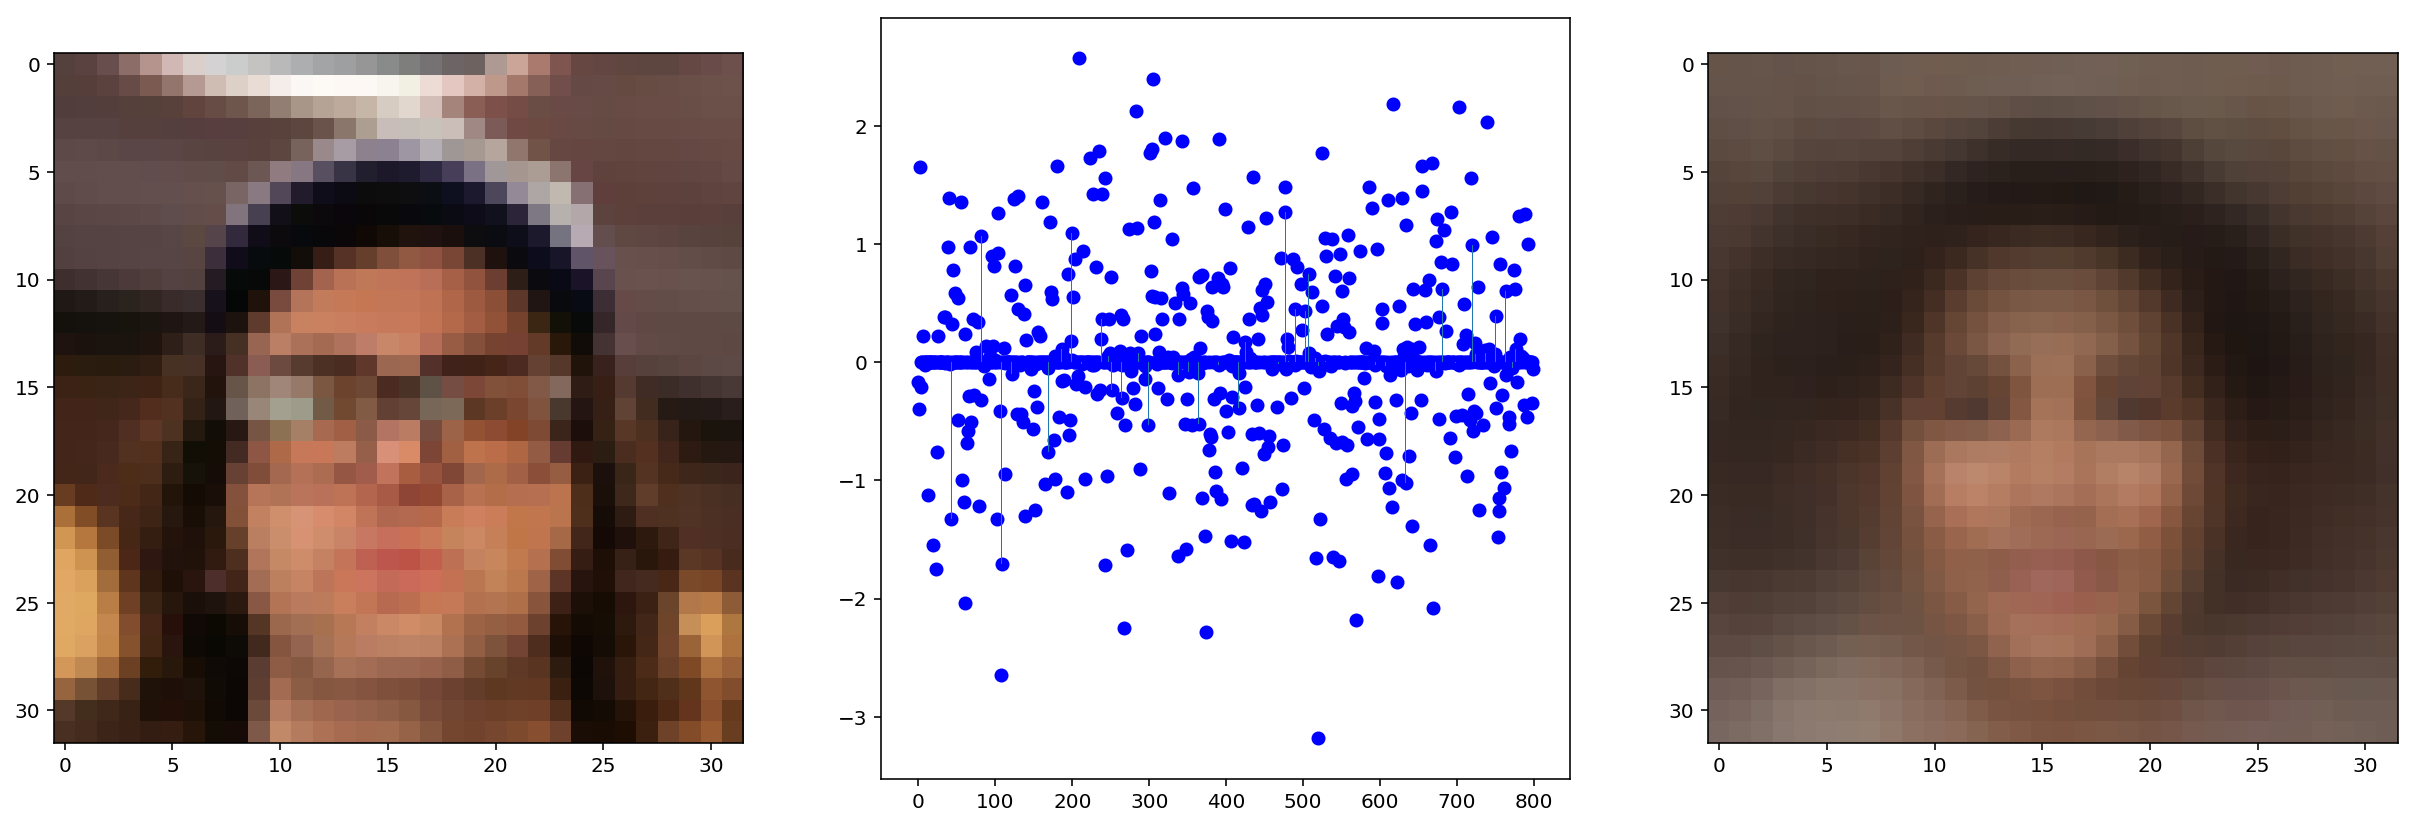

In [160]:
plot_encoding(images[3][None,:], vsc, negative=False)
plot_encoding(images[13][None,:], vsc, negative=False)
plot_encoding(images[31][None,:], vsc, negative=False)

## CelebA - 800 latent dimensions - alpha 0.01

In [169]:
latent_size = 800
batch_size = 32
hidden_size = '2000,2000'
alpha = 0.01
learning_rate = 0.001
epochs = 15
dataset = 'celeba'
device = 'cuda'
log_interval = 4000
report_interval = 100
reload_model = False
sample_size = 64

In [170]:
from src.utils import get_datasets
train_loader, test_loader, (width, height, channels) = get_datasets(
    dataset, batch_size, device, root='data')

from src.models.vsc import VariationalSparseCoding
vsc = VariationalSparseCoding(dataset, width, height, channels, hidden_size,
                              latent_size, learning_rate, alpha, device, 
                              log_interval)

Loading celeba dataset...
Done!



In [171]:
%%time
vsc.run_training(train_loader, test_loader, epochs, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/100000 (0%)]	Loss: 5693.174805
====> Epoch: 1 Average loss: 1827.3212
====> Test set loss: 1754.9615 - VLB-VSC : 56158.7668
Train Epoch: 2 [0/100000 (0%)]	Loss: 1771.486694
====> Epoch: 2 Average loss: 1744.7740
====> Test set loss: 1732.0898 - VLB-VSC : 55426.8726
Train Epoch: 3 [0/100000 (0%)]	Loss: 1631.721680
====> Epoch: 3 Average loss: 1725.6645
====> Test set loss: 1718.4788 - VLB-VSC : 54991.3202
Train Epoch: 4 [0/100000 (0%)]	Loss: 1678.555298
====> Epoch: 4 Average loss: 1715.0984
====> Test set loss: 1714.3994 - VLB-VSC : 54860.7806
Train Epoch: 5 [0/100000 (0%)]	Loss: 1647.830688
====> Epoch: 5 Average loss: 1711.4908
====> Test set loss: 1711.6798 - VLB-VSC : 54773.7544
Train Epoch: 6 [0/100000 (0%)]	Loss: 1663.416992
====> Epoch: 6 Average loss: 1710.0286
====> Test set loss: 1709.1455 - VLB-VSC : 54692.6574
Train Epoch: 7 [0/100000 (0%)]	Loss: 1727.958862
====> Epoch: 7 Average loss: 1708.9078
====> Test set loss: 1709.4089 - VLB-V

In [173]:
images, _ = iter(test_loader).next()

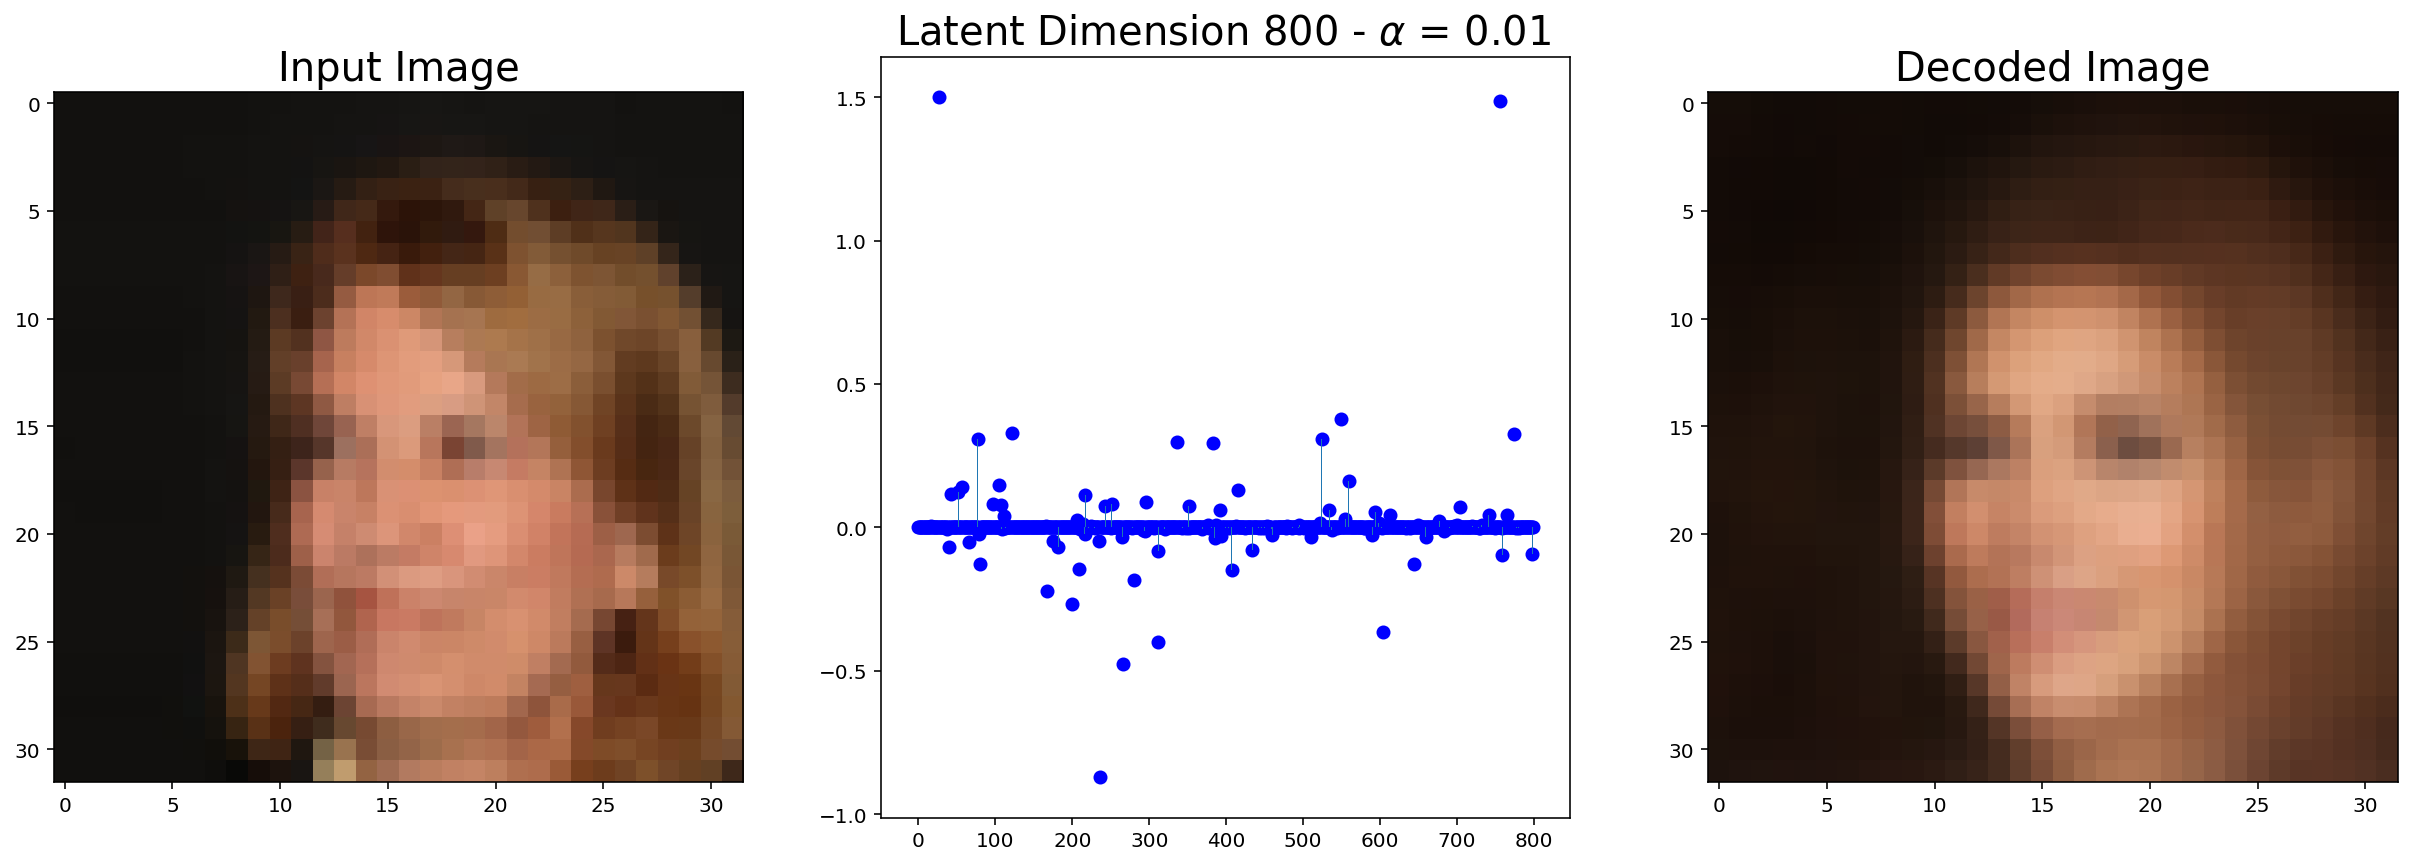

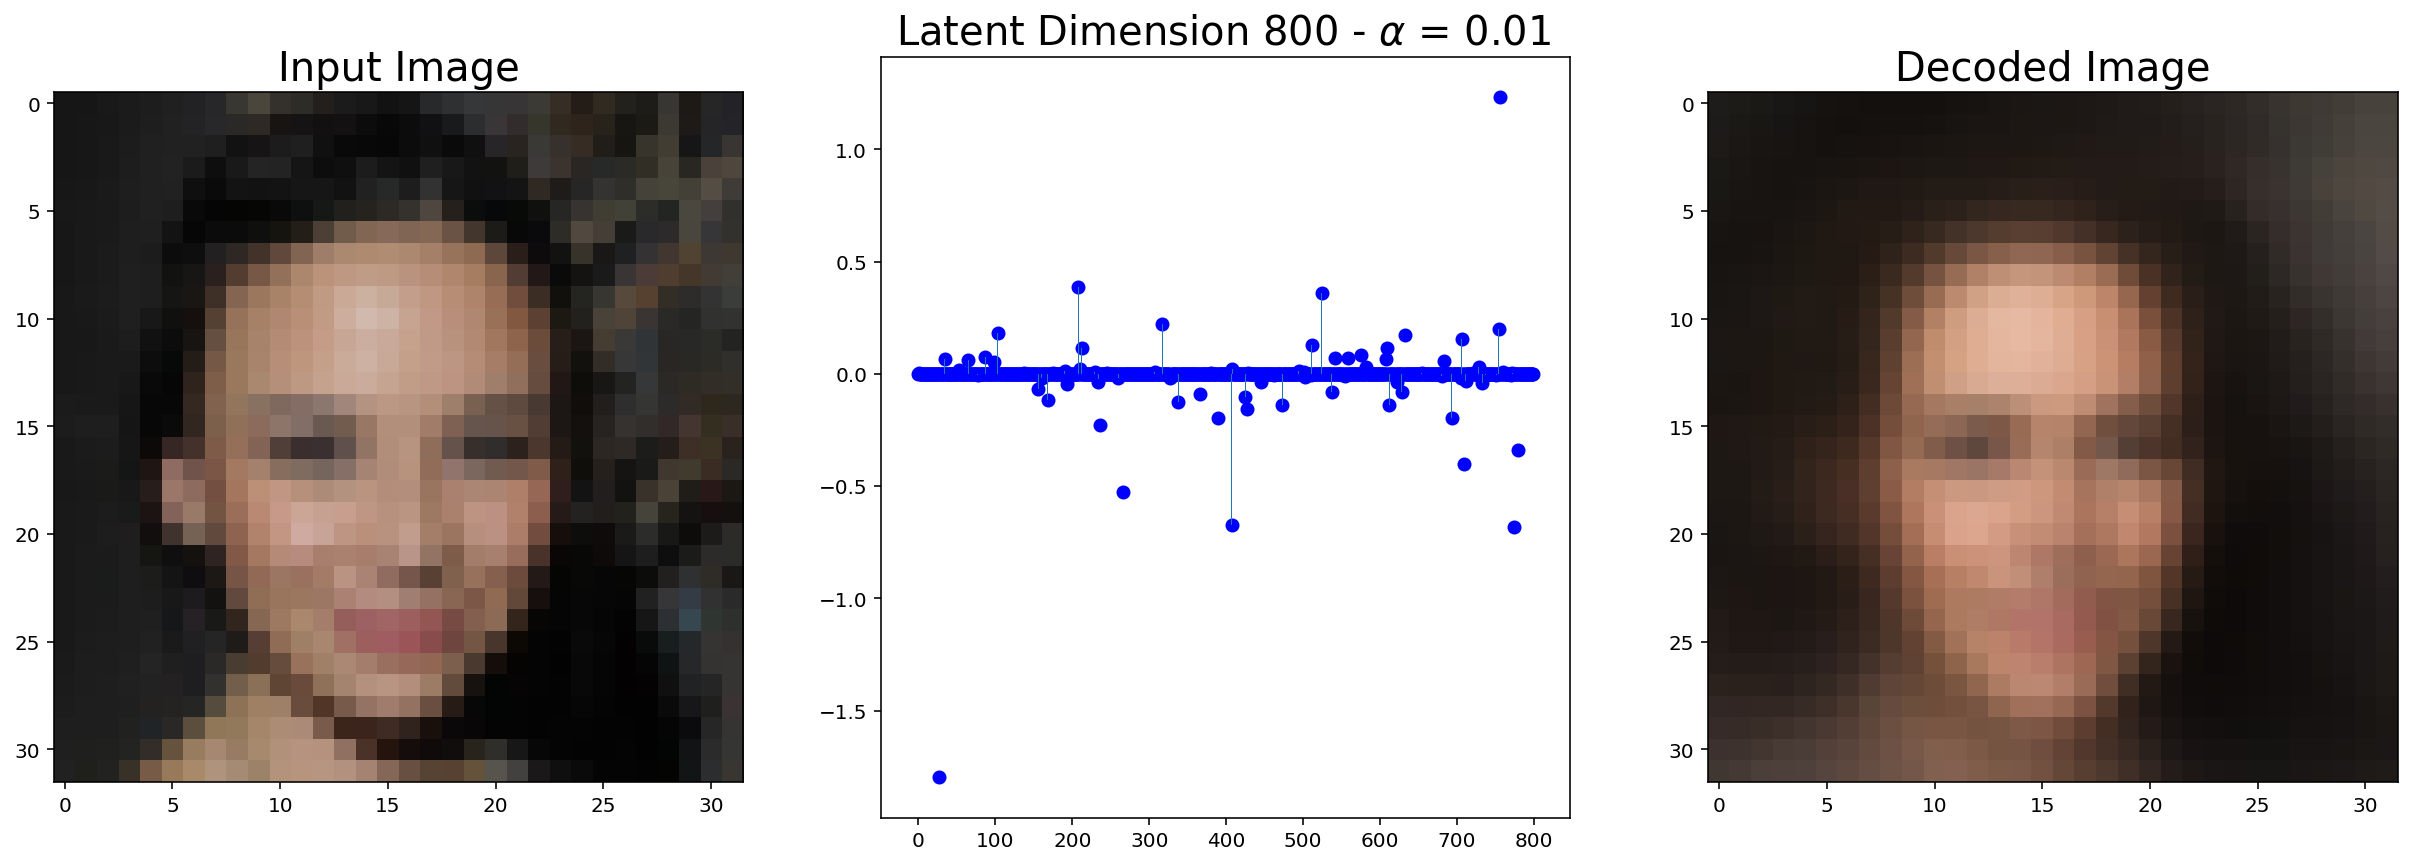

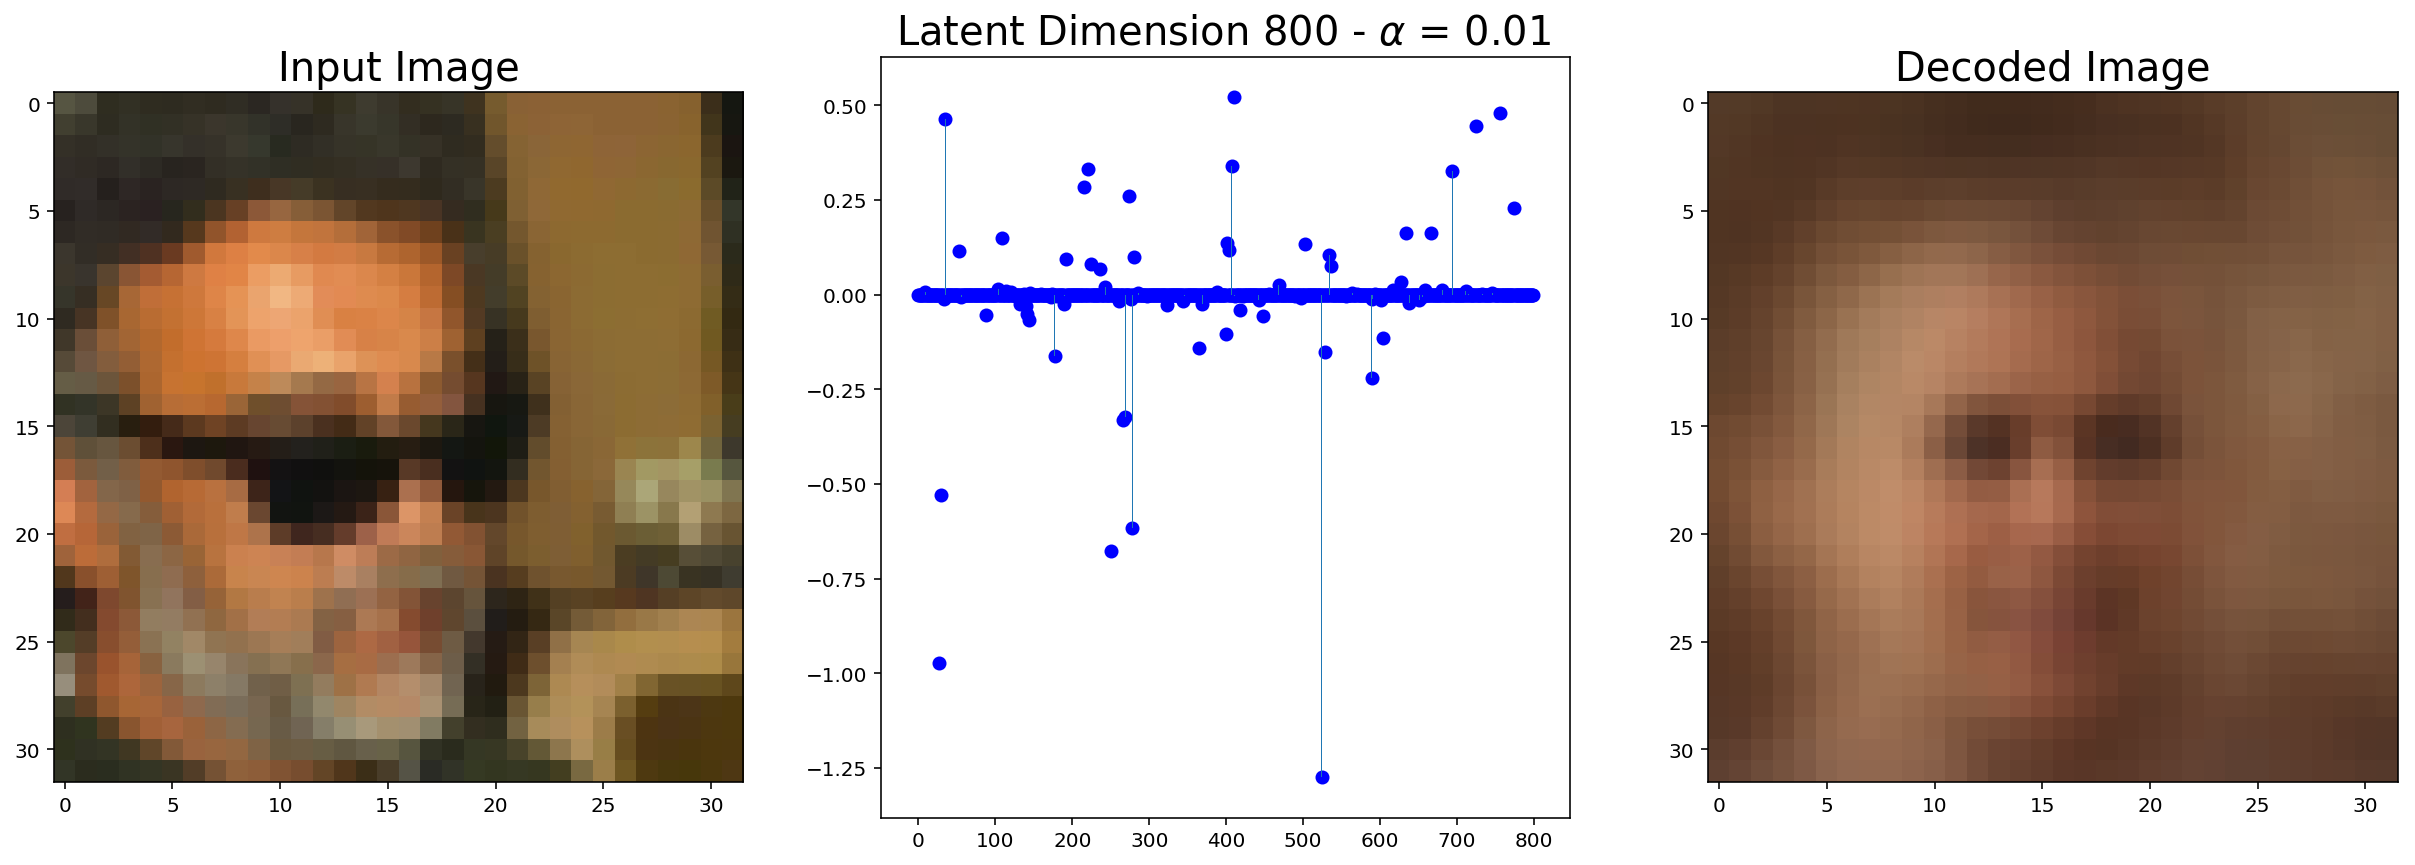

In [174]:
plot_encoding(images[15][None,:], vsc, latent_size, alpha, False, 1/2)
plot_encoding(images[20][None,:], vsc, latent_size, alpha, False, 1/2)
plot_encoding(images[25][None,:], vsc, latent_size, alpha, False, 1/2)

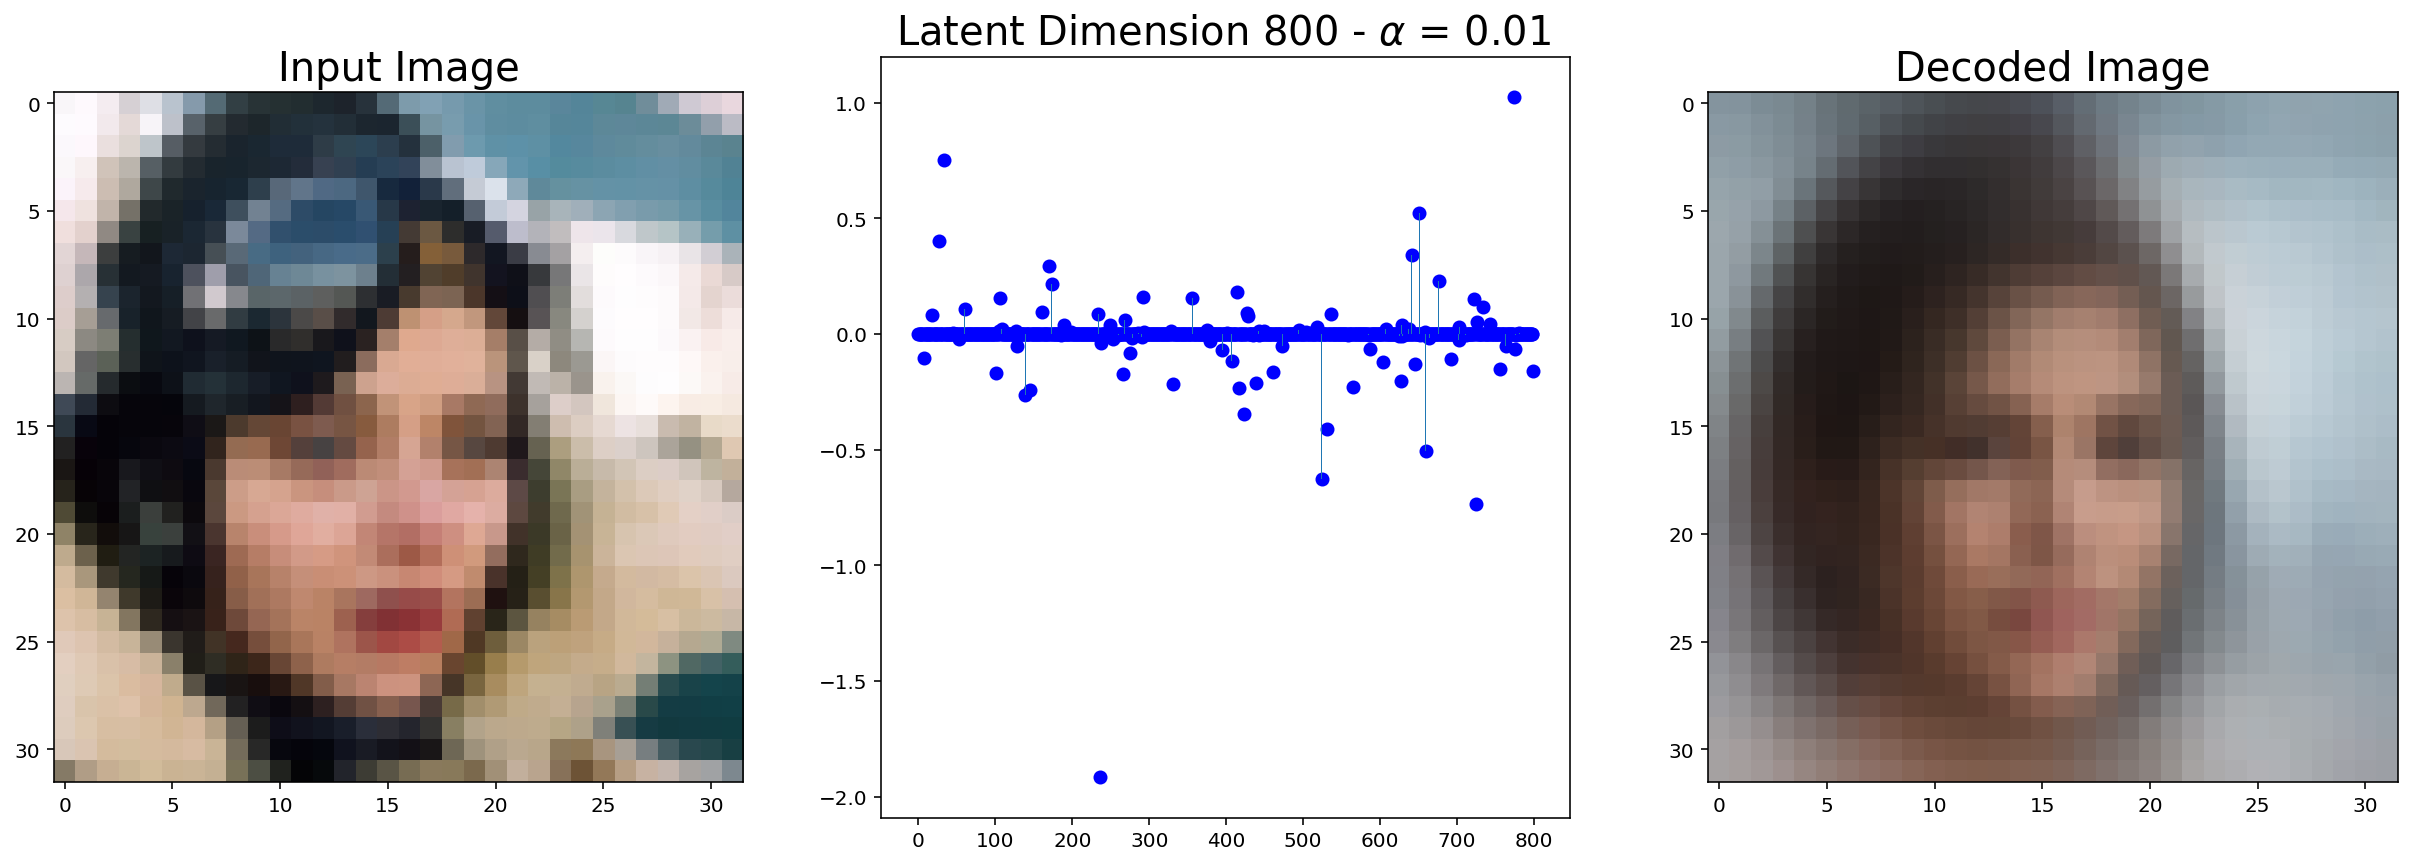

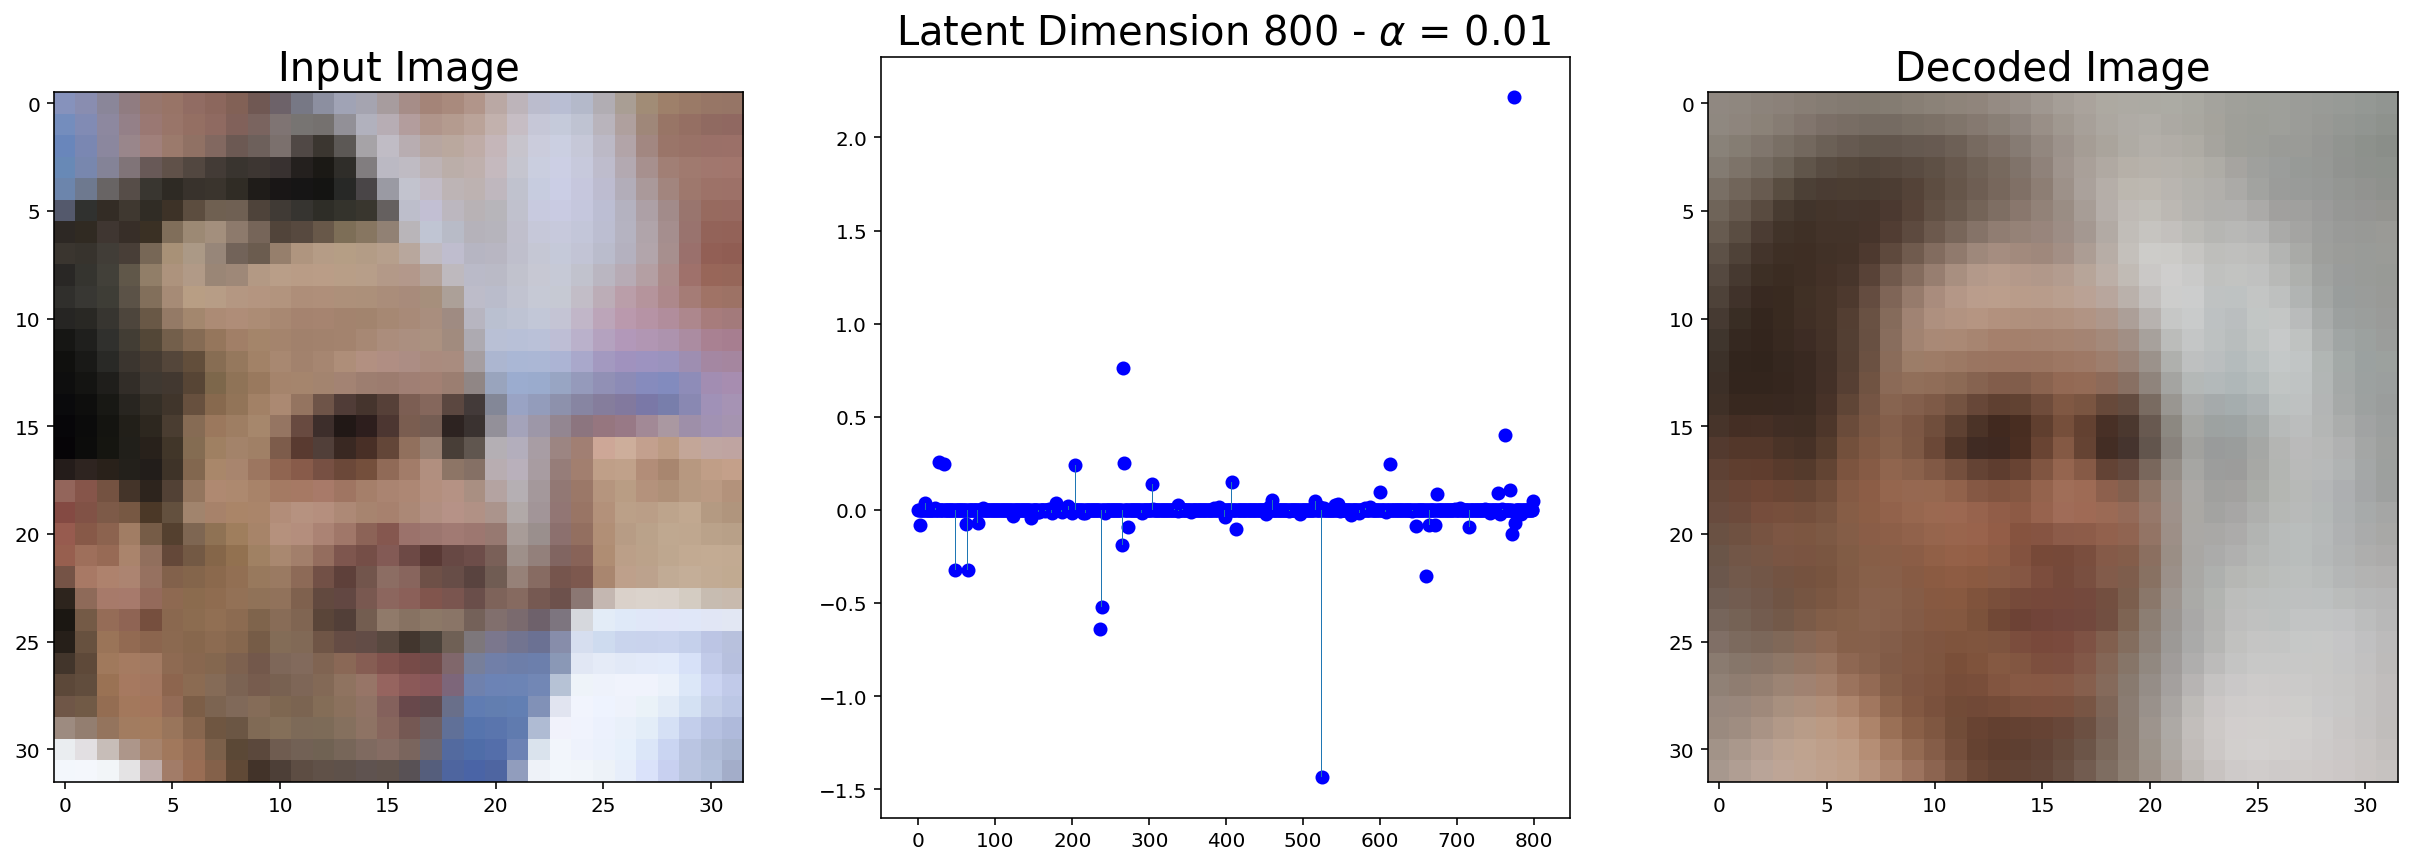

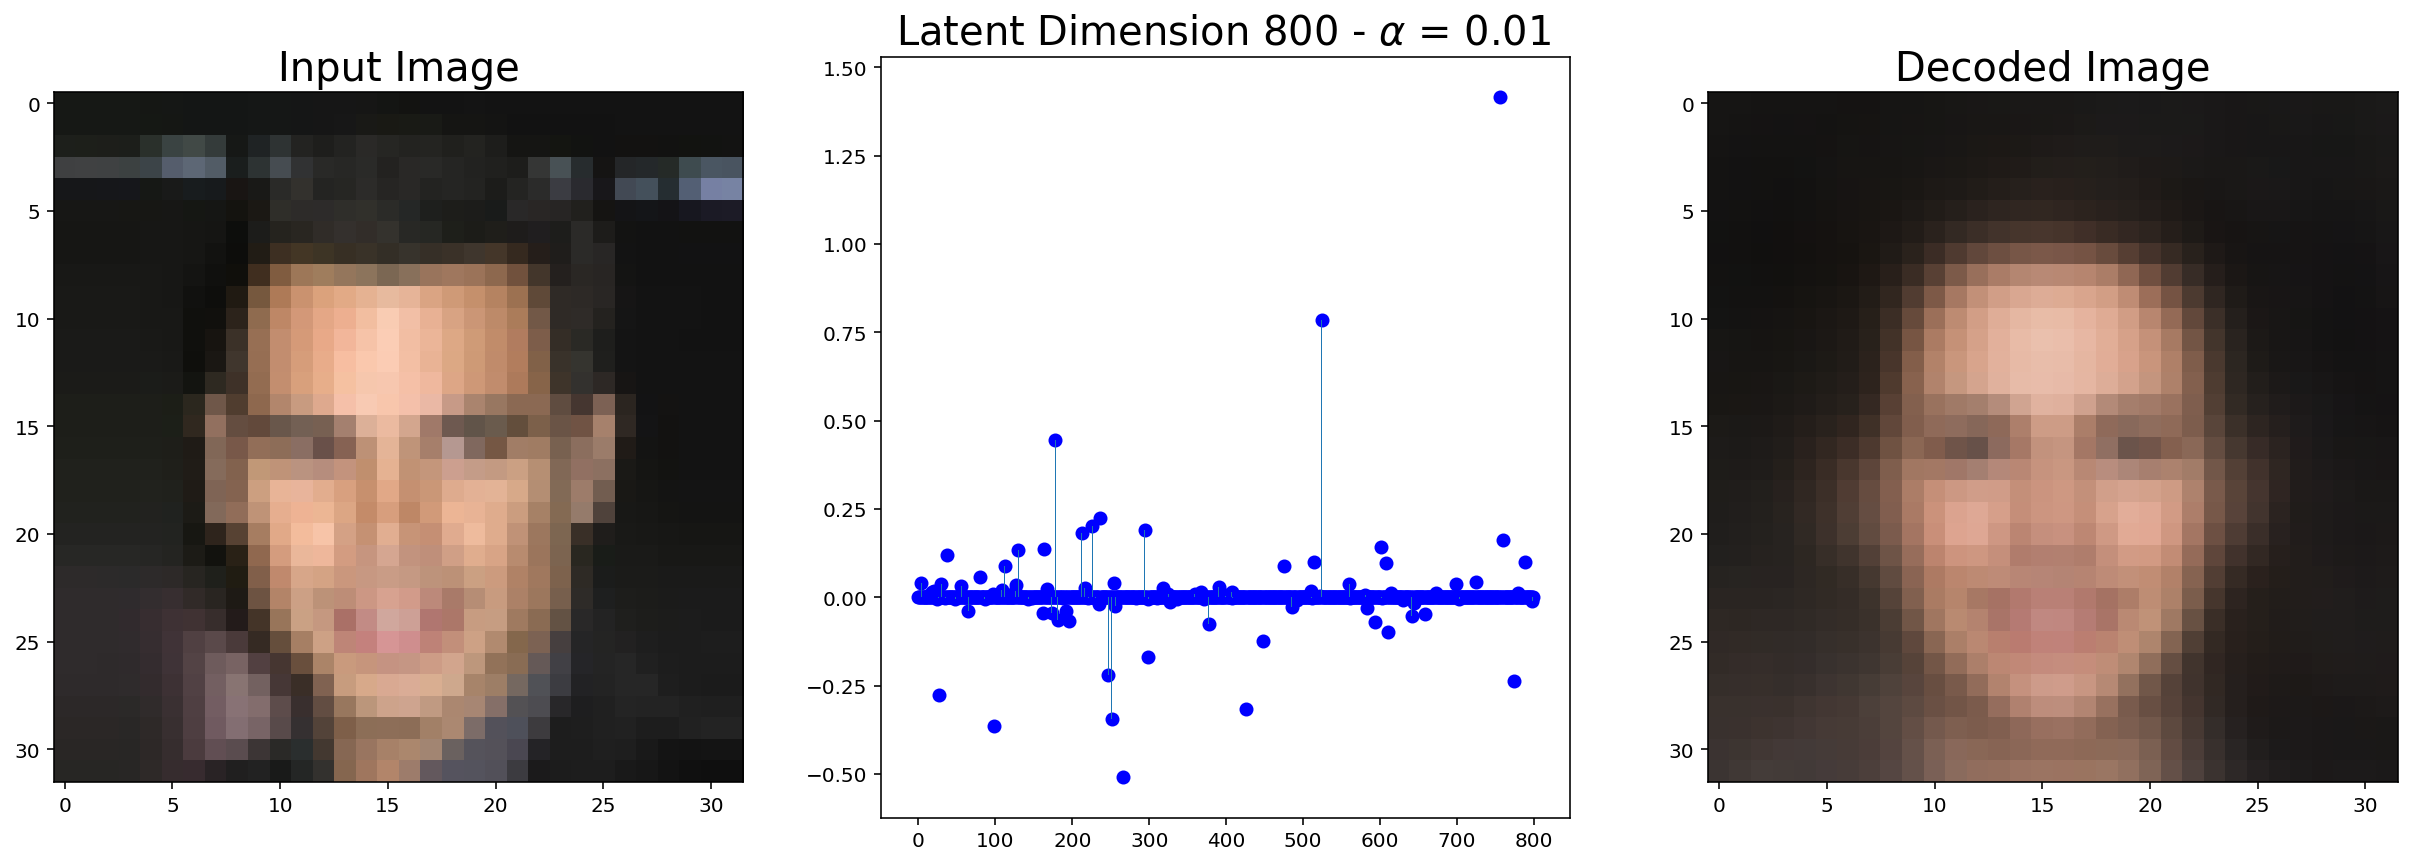

In [175]:
plot_encoding(images[2][None,:], vsc, latent_size, alpha, False, 1/2)
plot_encoding(images[3][None,:], vsc, latent_size, alpha, False, 1/2)
plot_encoding(images[4][None,:], vsc, latent_size, alpha, False, 1/2)

## 20 latent size

In [178]:
latent_size = 20
batch_size = 32
hidden_size = '500,500'
alpha = 0.01
learning_rate = 0.001
epochs = 15
dataset = 'celeba'
device = 'cuda'
log_interval = 4000
report_interval = 100
reload_model = False
sample_size = 64

In [179]:
from src.models.vsc import VariationalSparseCoding
vsc2 = VariationalSparseCoding(dataset, width, height, channels, hidden_size,
                              latent_size, learning_rate, alpha, device, 
                              log_interval)

In [180]:
%%time
vsc2.run_training(train_loader, test_loader, epochs, report_interval, 
                 sample_size, reload_model)

Training VSC model...
Train Epoch: 1 [0/100000 (0%)]	Loss: 2221.506836
====> Epoch: 1 Average loss: 1796.0660
====> Test set loss: 1765.8889 - VLB-VSC : 56508.4447
Train Epoch: 2 [0/100000 (0%)]	Loss: 1789.450684
====> Epoch: 2 Average loss: 1757.4885
====> Test set loss: 1754.9528 - VLB-VSC : 56158.4881
Train Epoch: 3 [0/100000 (0%)]	Loss: 1772.354004
====> Epoch: 3 Average loss: 1752.5379
====> Test set loss: 1750.9402 - VLB-VSC : 56030.0866
Train Epoch: 4 [0/100000 (0%)]	Loss: 1786.711914
====> Epoch: 4 Average loss: 1747.7021
====> Test set loss: 1745.7543 - VLB-VSC : 55864.1381
Train Epoch: 5 [0/100000 (0%)]	Loss: 1656.198975
====> Epoch: 5 Average loss: 1743.8020
====> Test set loss: 1743.9427 - VLB-VSC : 55806.1653
Train Epoch: 6 [0/100000 (0%)]	Loss: 1819.865112
====> Epoch: 6 Average loss: 1741.7242
====> Test set loss: 1741.8164 - VLB-VSC : 55738.1249
Train Epoch: 7 [0/100000 (0%)]	Loss: 1770.545654
====> Epoch: 7 Average loss: 1739.5565
====> Test set loss: 1741.1707 - VLB-V

In [ ]:
images, _ = iter(test_loader).next()

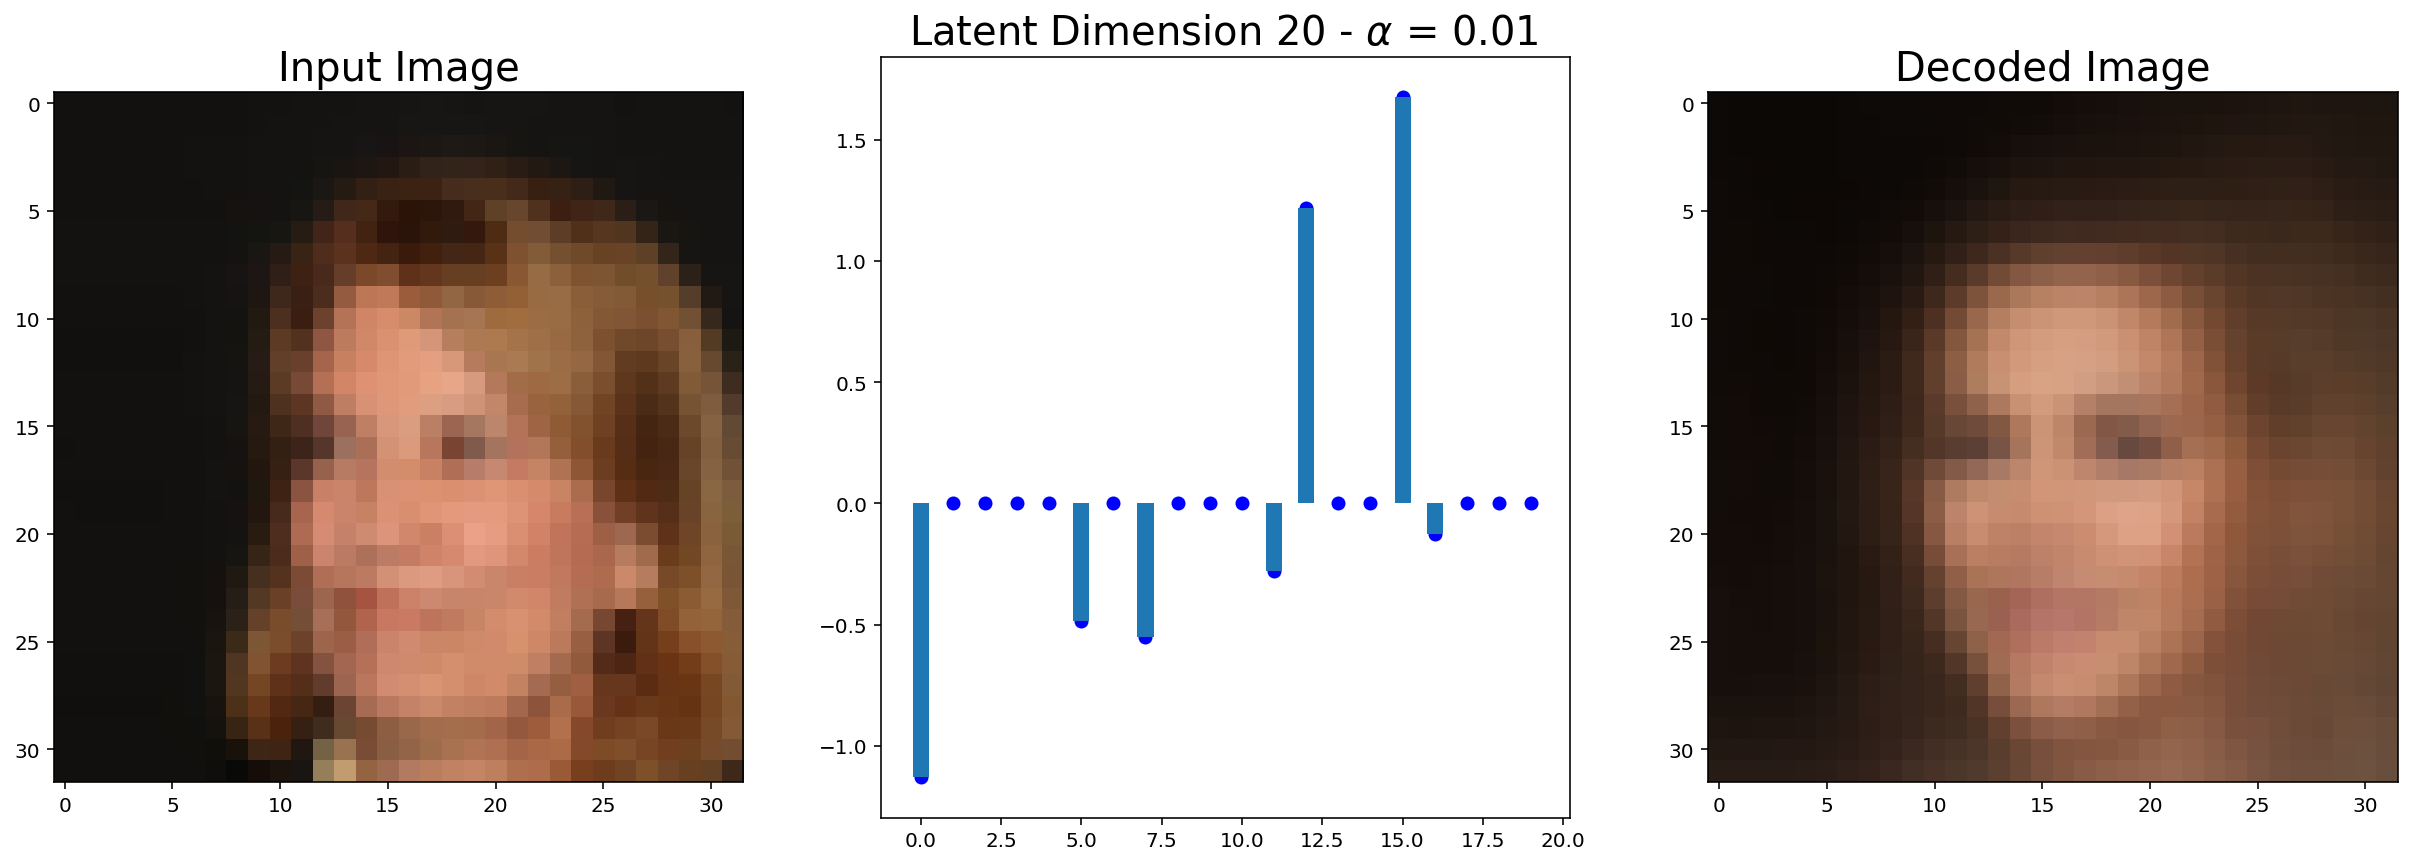

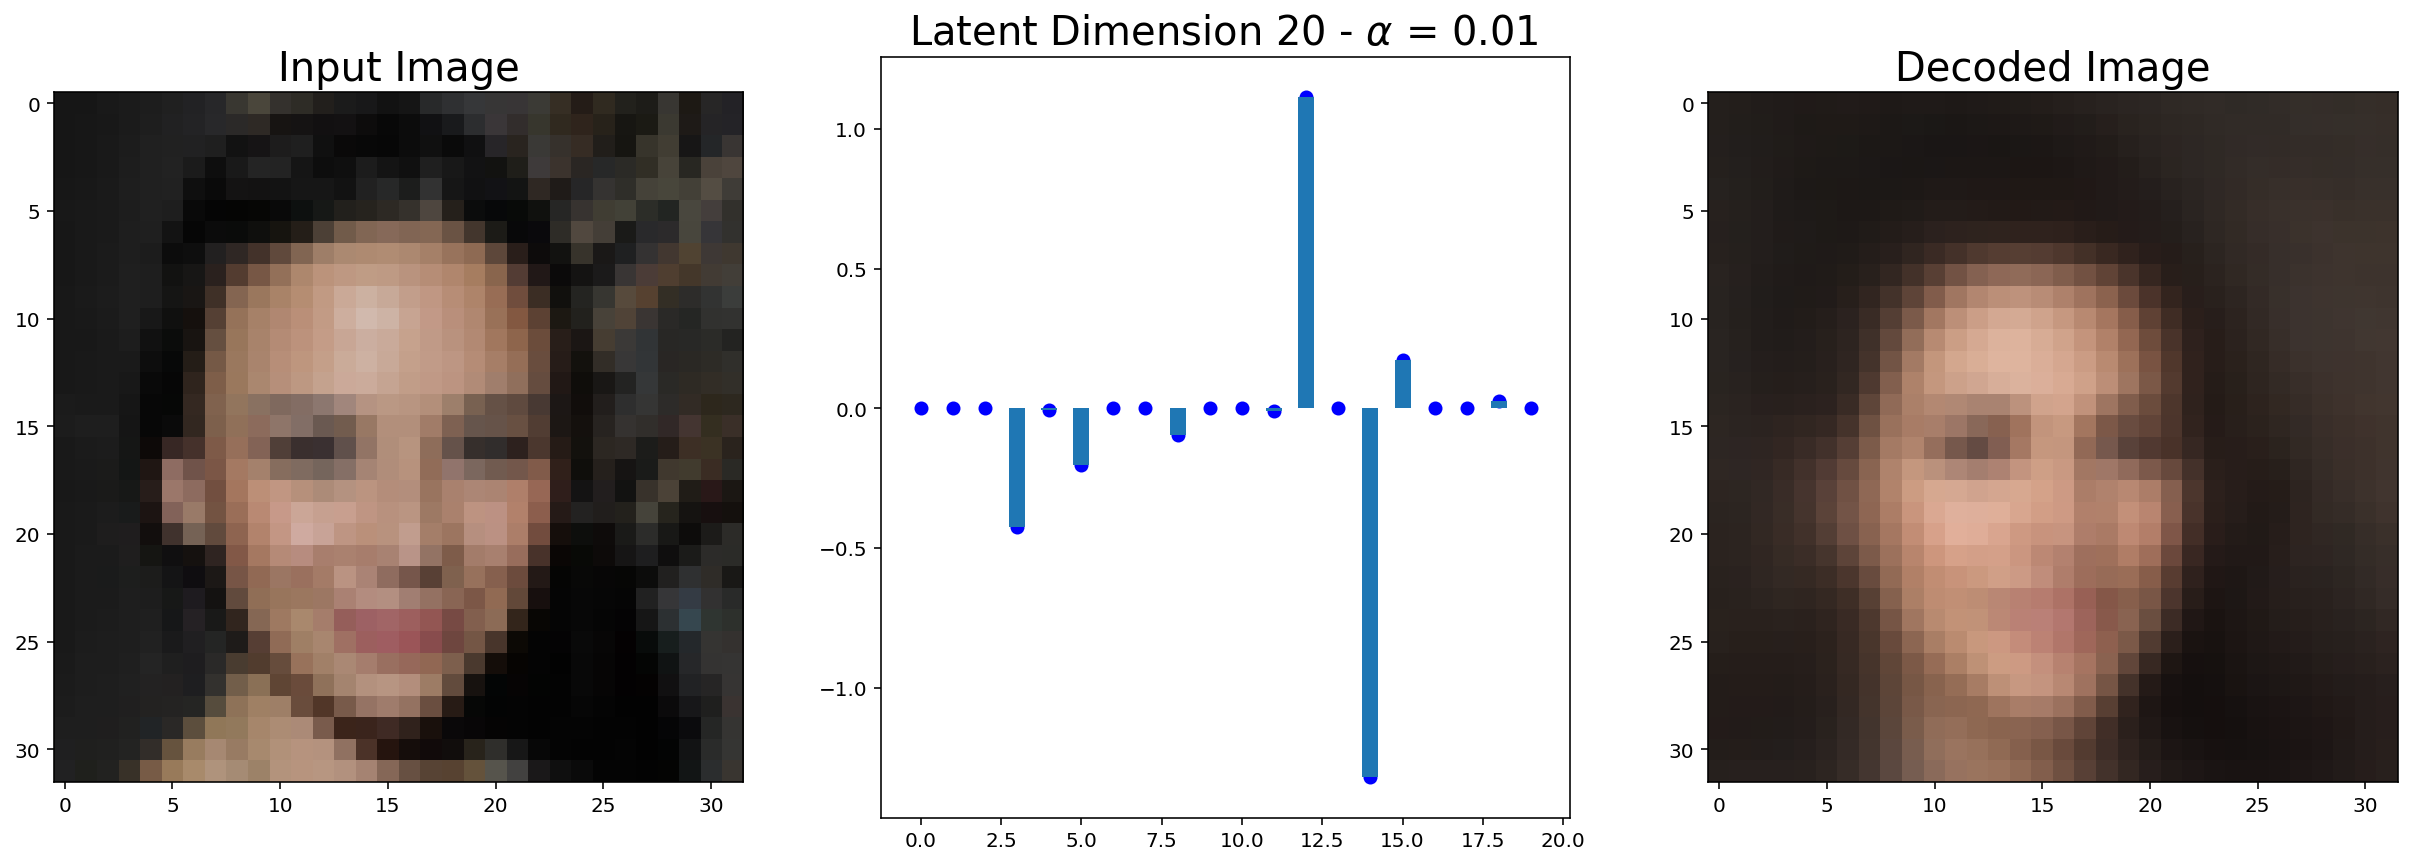

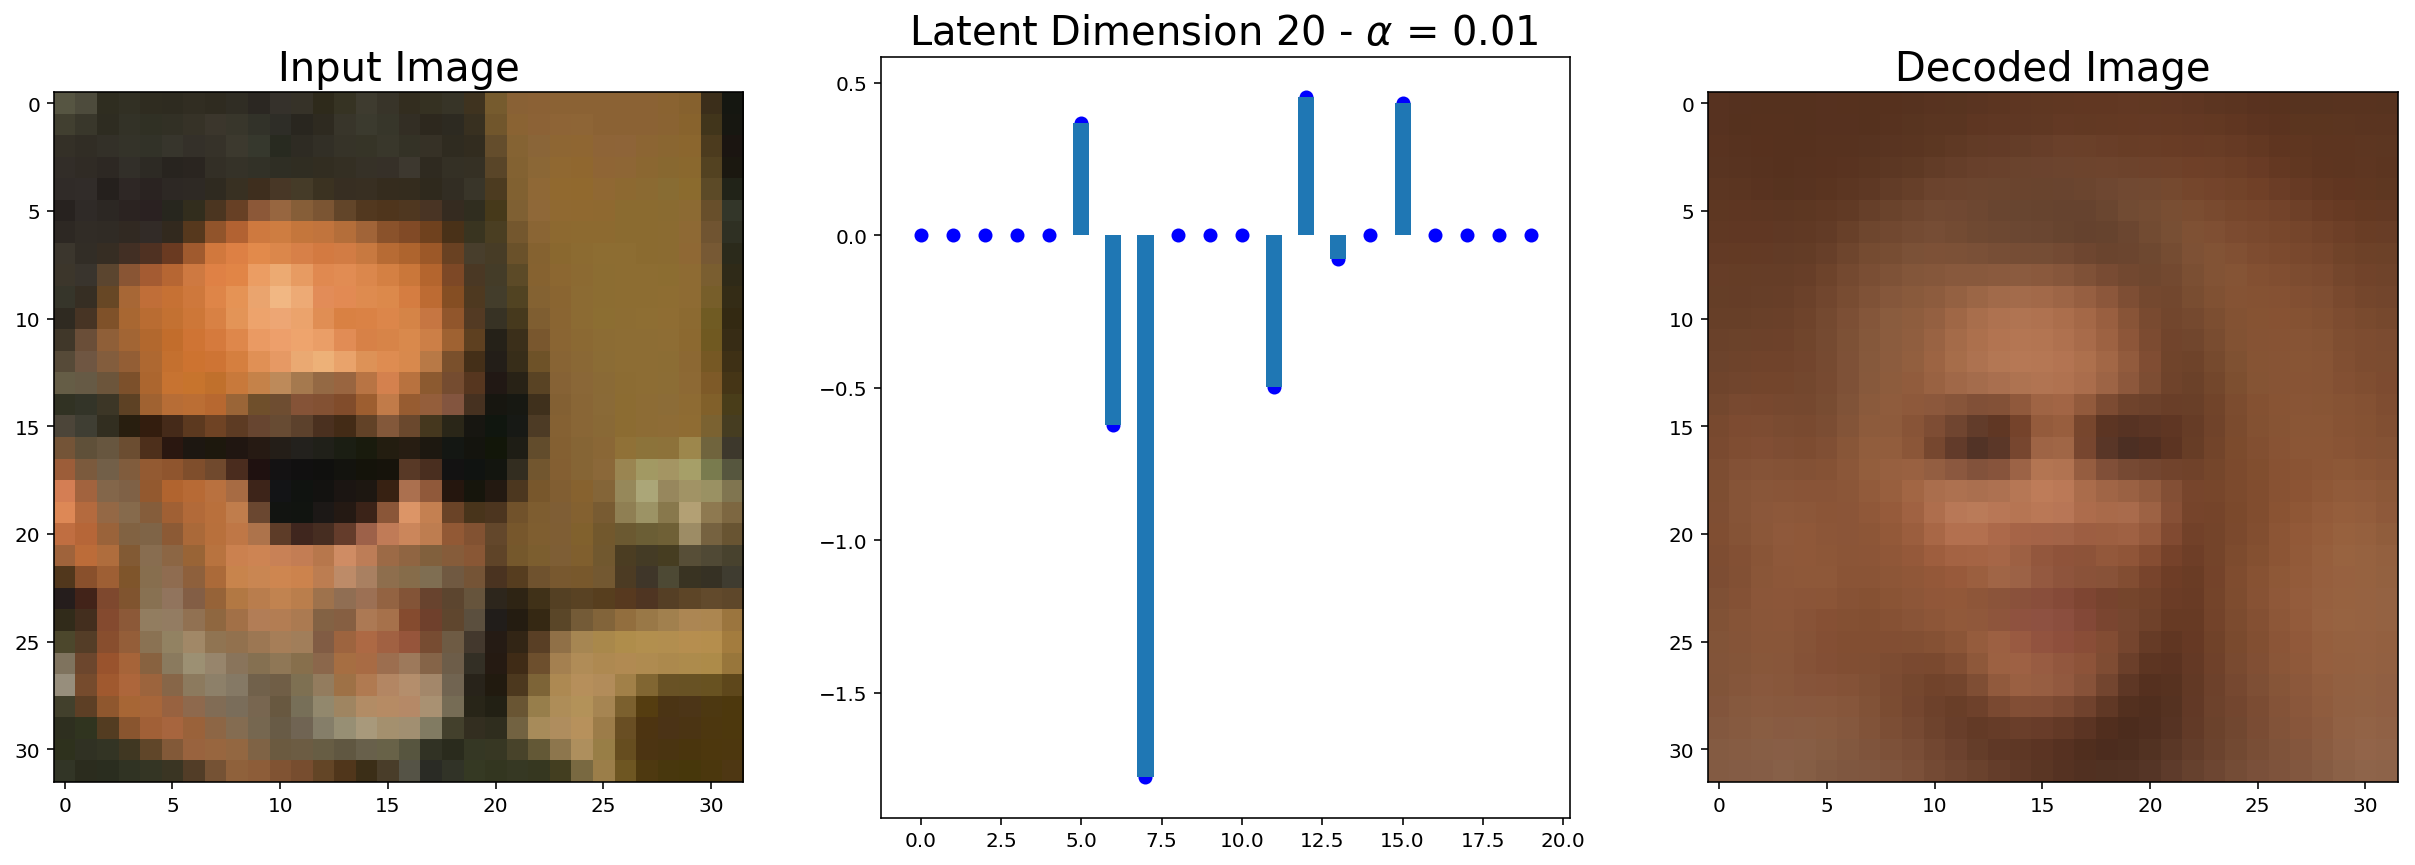

In [182]:
plot_encoding(images[15][None,:], vsc2, latent_size, alpha, False, 1/2)
plot_encoding(images[20][None,:], vsc2, latent_size, alpha, False, 1/2)
plot_encoding(images[25][None,:], vsc2, latent_size, alpha, False, 1/2)

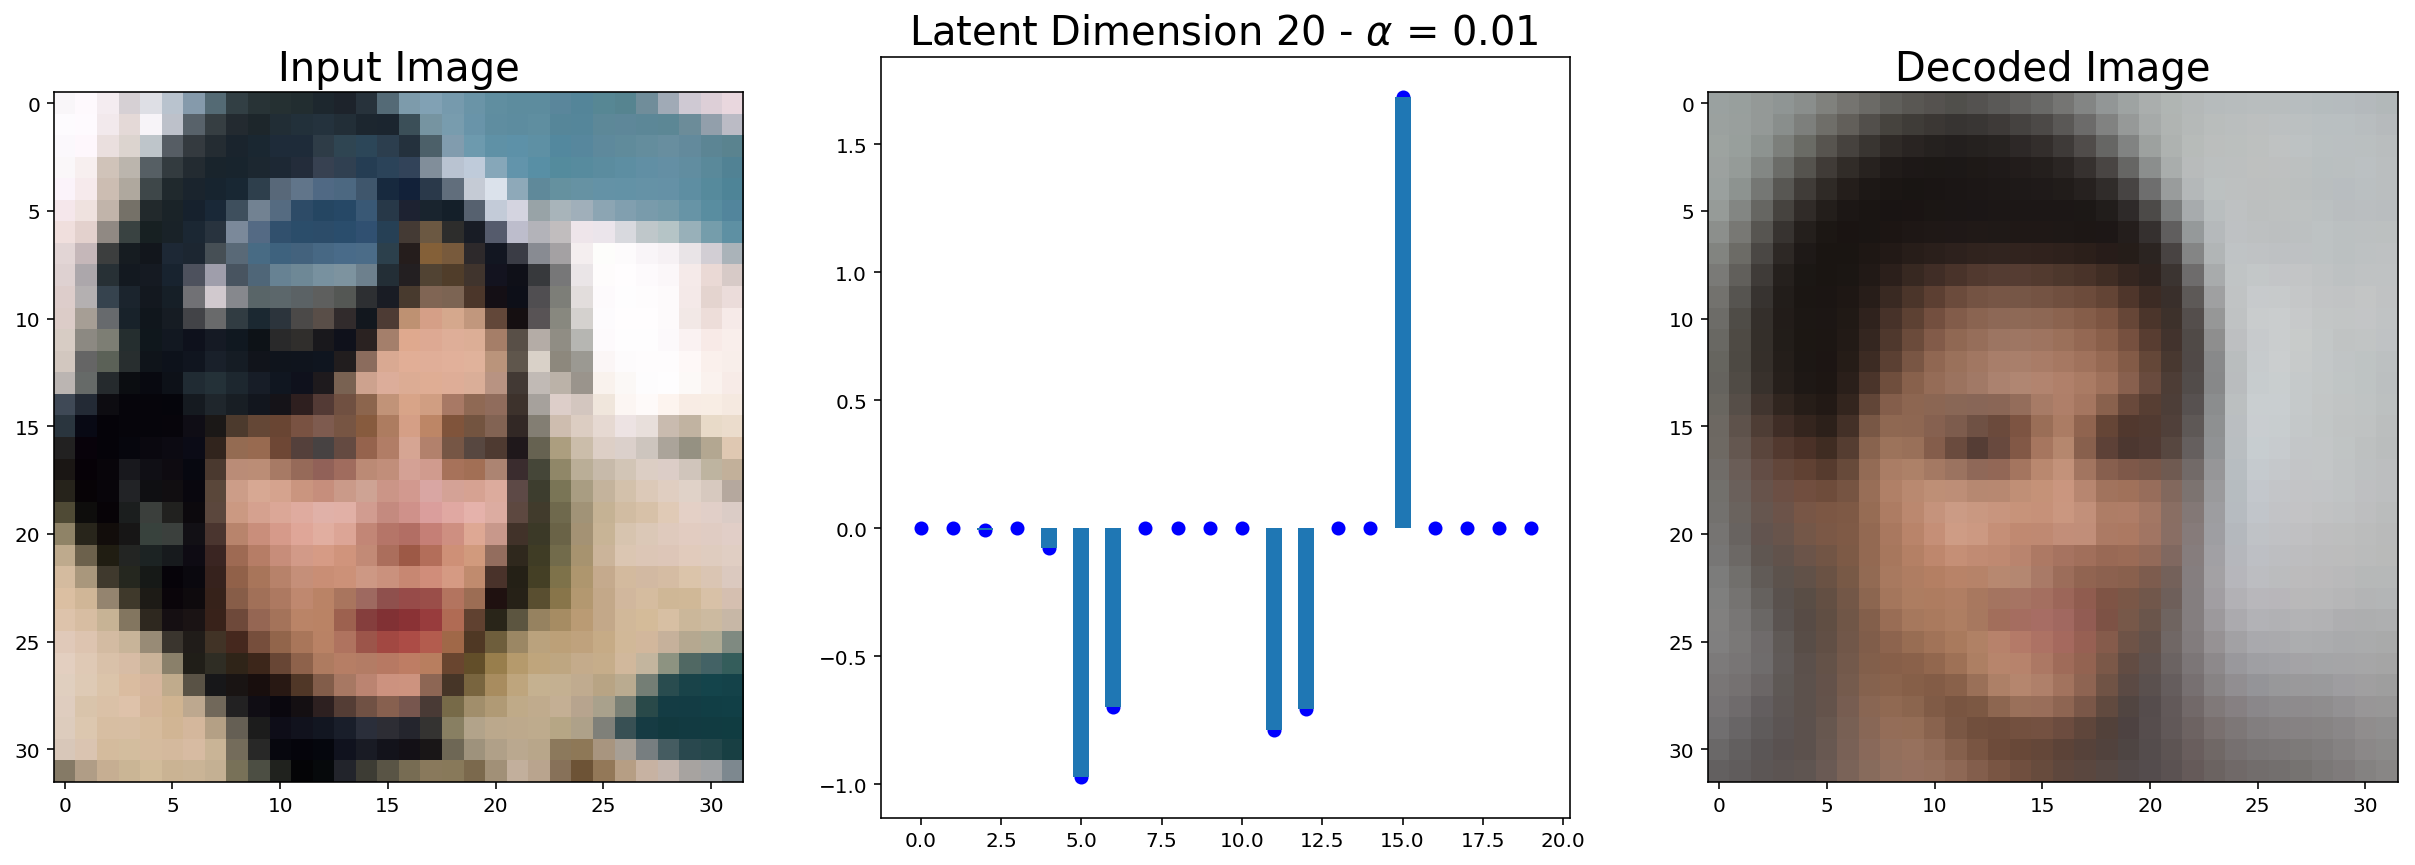

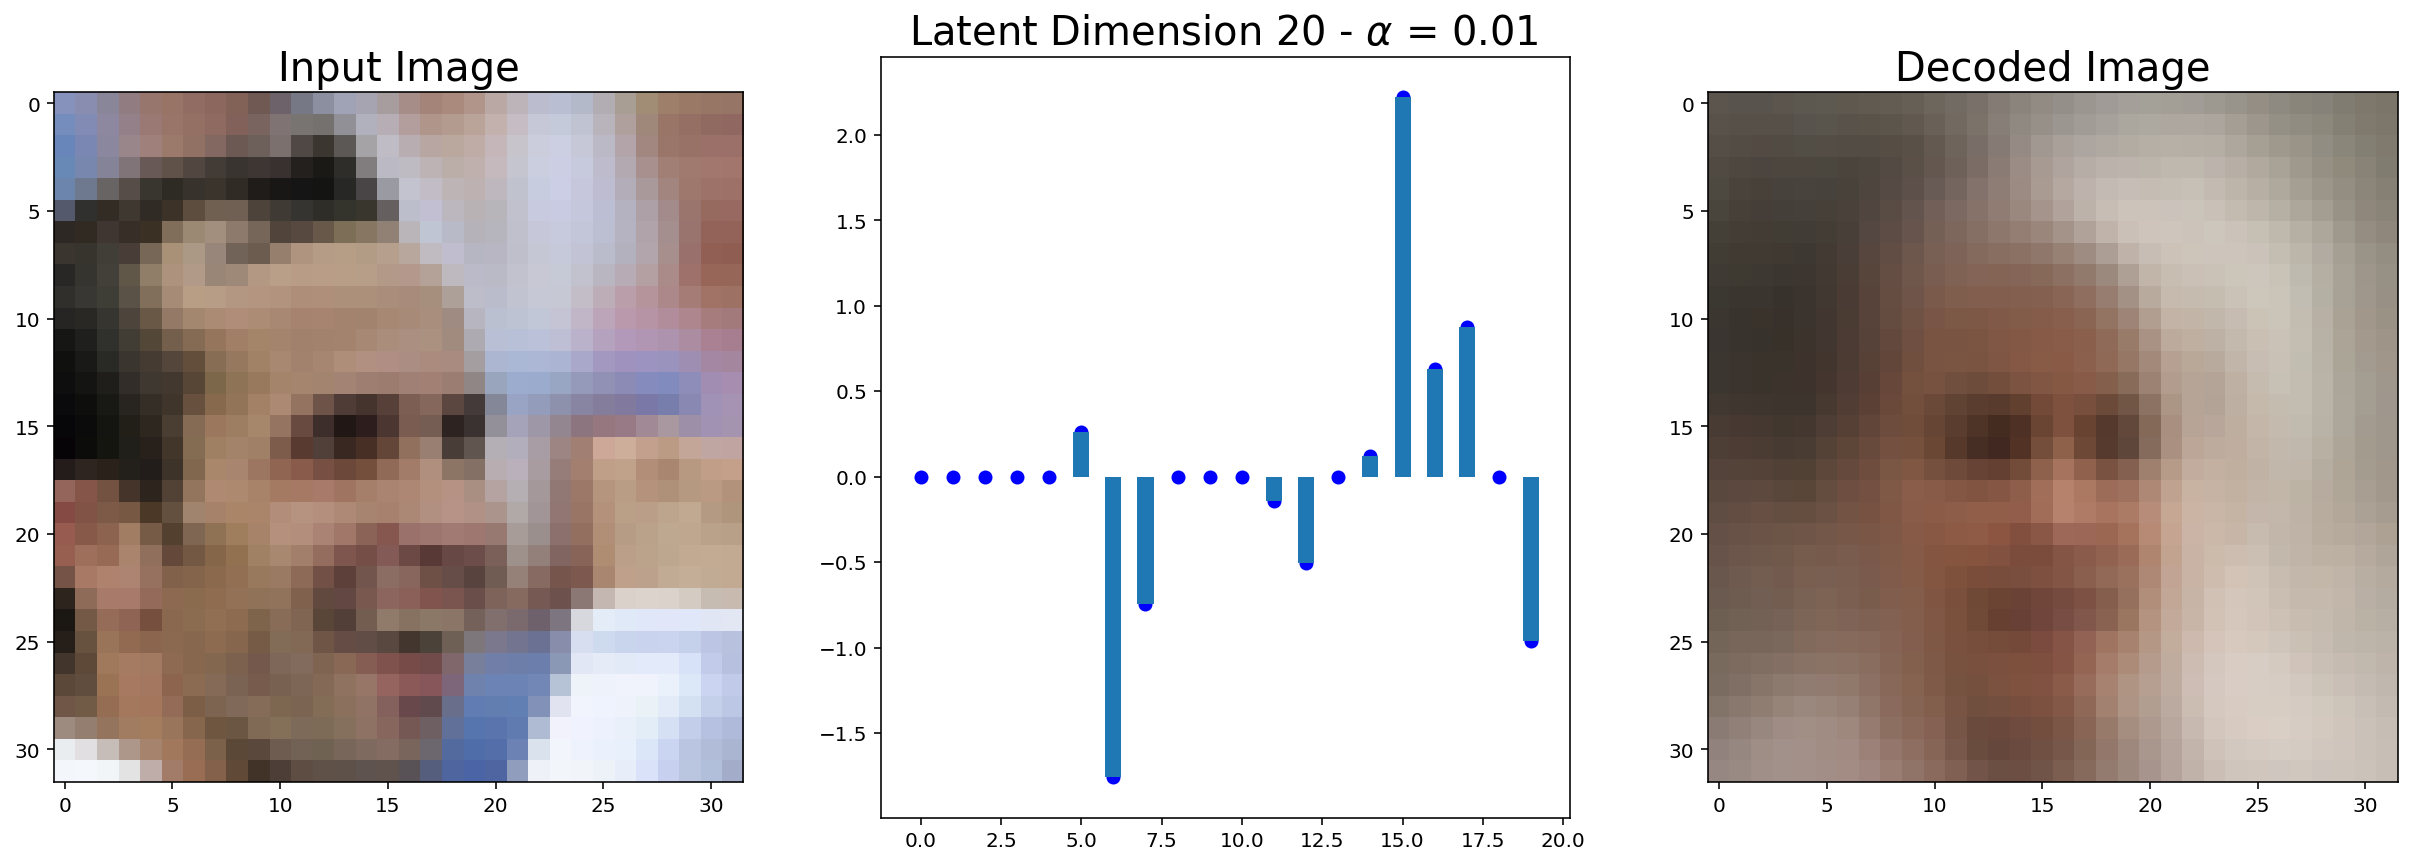

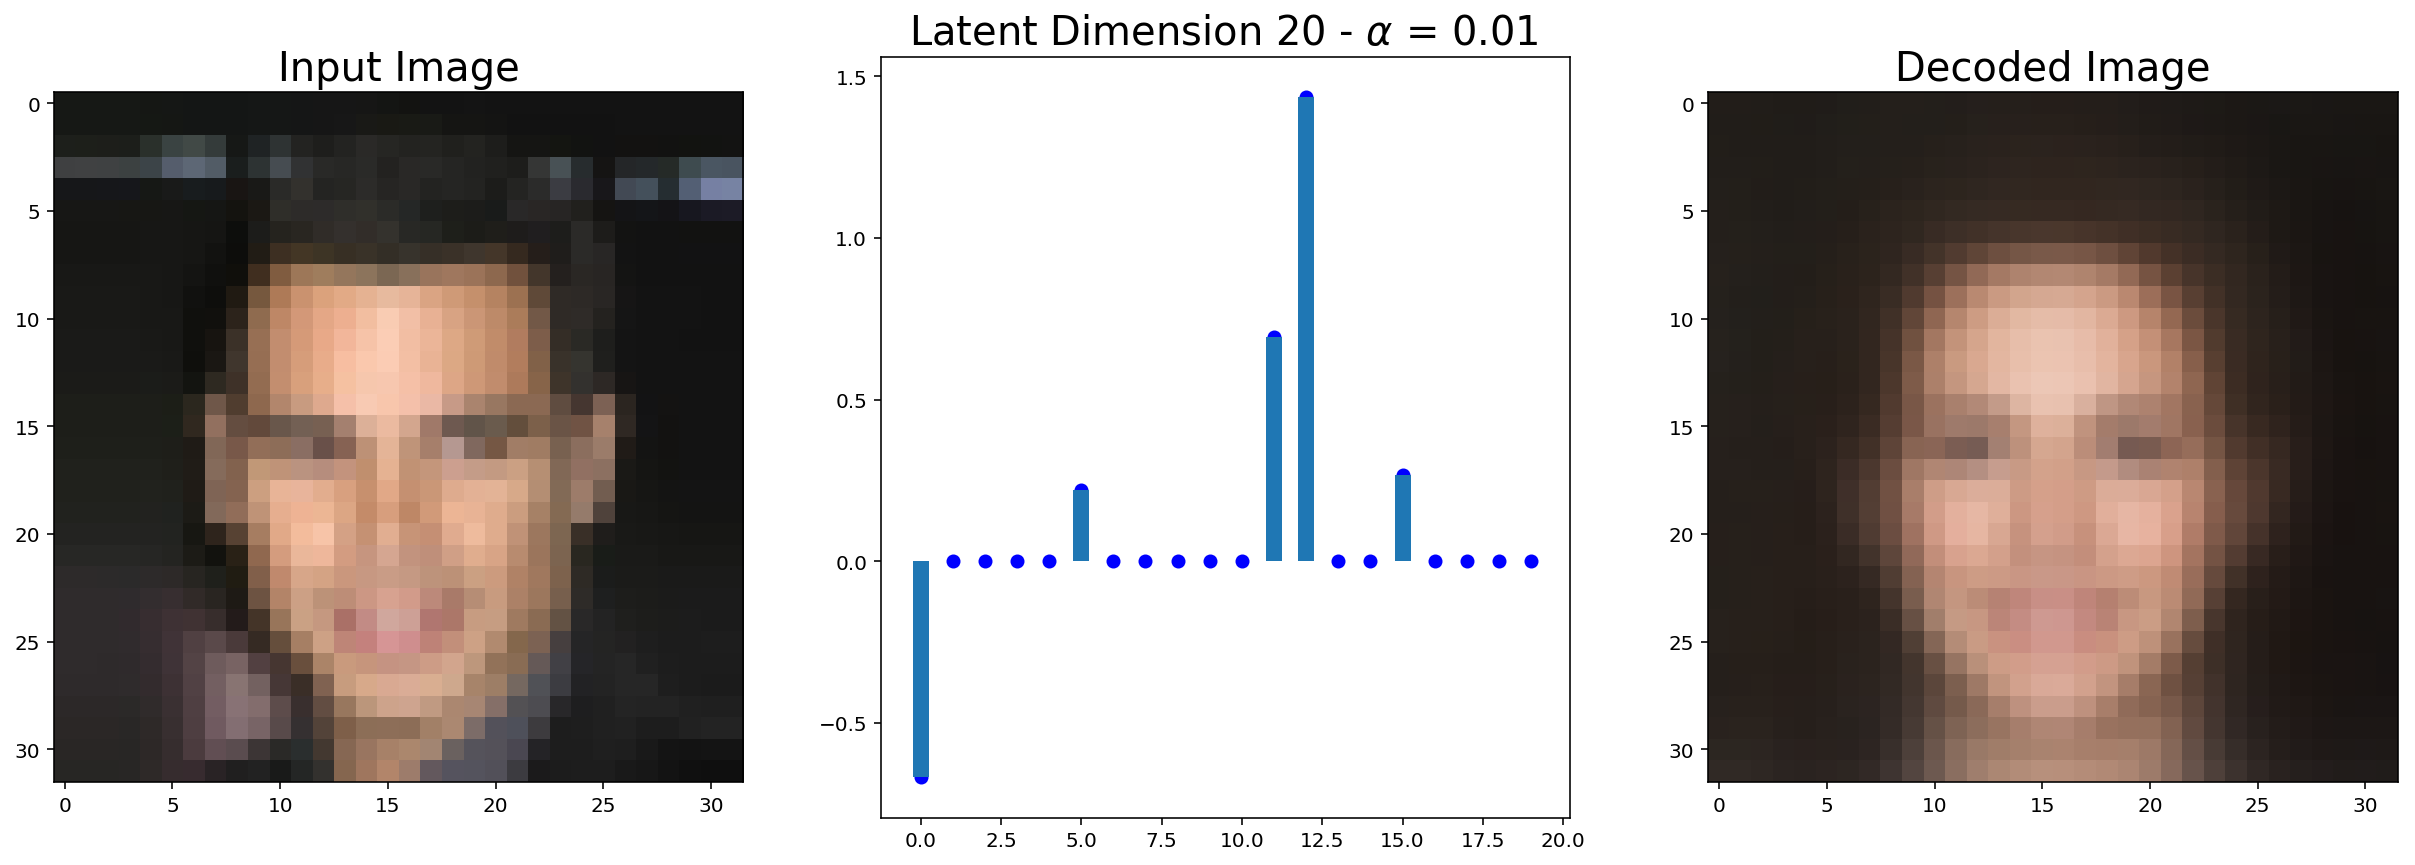

In [184]:
plot_encoding(images[2][None,:], vsc2, latent_size, alpha, False, 1/2)
plot_encoding(images[3][None,:], vsc2, latent_size, alpha, False, 1/2)
plot_encoding(images[4][None,:], vsc2, latent_size, alpha, False, 1/2)

## Interpretability traversal

In [ ]:
import imageio

def plot_interpretability_traversal ( example_image , model , alpha , length , delta, width = 1/2 ):
    
    decoded , mu, logvar,logspike  = model.forward( example_image )
    z = model.reparameterize( mu , logvar , logspike  )
    
    # Modify the highest value in encoding
    minn = z.min().detach().numpy()
    maxx = z.max().detach().numpy()
    max_ind = torch.argmax( z ).item()
    
    images = []
    for i in range(length):

        z1 = z.clone()

        fig, ax = plt.subplots(nrows=1, ncols = 2 , figsize=(10,5 ) )
    
        #Plot encodings
        ax[0].bar( np.arange(z1.shape[1]) , height = z1.detach().numpy()[0] , width = width  )
        ax[0].scatter(  np.arange(z1.shape[1]) , z1.detach().numpy()[0], color = 'blue' )
        ax[0].scatter(  max_ind , z1[0, max_ind].detach().numpy() , color = 'red' )
        ax[0].set_title(r"Latent Dimension %d - $\alpha$ = %.2f "%(z.shape[1], alpha) , fontsize = 20)
        ax[0].set_ylim(-2.5,2.5)
    

        #Plot decoded images
        img =  torchvision.utils.make_grid( model.decode( z1 ).view(1,1,28,28) ) 
        npimg = 1 - img.detach().numpy() # White background
        ax[1].imshow(np.transpose(npimg, (1, 2, 0)))
        ax[1].set_title('Decoded Image', fontsize = 20 )

        plt.savefig( 'Latent'+str(i)+'.png' ,  dpi = 600)
        plt.close()
        images.append(imageio.imread('Latent'+str(i)+'.png'))
        
        z[ 0, max_ind ] -= delta
        
    imageio.mimsave('movie.gif', images)

## Traversal demo

In [189]:
from ipywidgets import interact, FloatSlider

In [190]:
def plot_encoding(image, vsc, latent_sz, alpha, negative=True, width=1/7):
    flattened_image = vsc.normalize(image).to(vsc.device)
    decoded, mu, logvar, logspike = vsc.model.forward(flattened_image)
    z = vsc.model.reparameterize(mu, logvar, logspike)
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(21,7))
    
    img = torchvision.utils.make_grid(image).detach().numpy()
    if negative: img = 1 - img
    plot_image(img, ax0)
    ax0.set_title('Input Image', fontsize=20)
    
    ax1.bar(np.arange(z.shape[1]), height=z.cpu().detach().numpy()[0],
            width=width, align='center')
    ax1.scatter(np.arange(z.shape[1]), z.cpu().detach().numpy()[0],
            color='blue')
    ax1.set_title(r"Latent Dimension %d - $\alpha$ = %.2f " % \
                  (z.shape[1], alpha), fontsize=20)
    
    img = vsc.denormalize(vsc.model.decode(z))
    img = torchvision.utils.make_grid(
            img.view(1,vsc.channels,vsc.height,vsc.width)) \
            .cpu().detach().numpy()
    if negative: img = 1 - img
    plot_image(img, ax2)
    ax2.set_title('Decoded Image', fontsize=20)
    plt.subplots_adjust(hspace=0.5)

In [208]:
def plot_result(**dimensions):
    dimensions = [x[1] for x in sorted(dimensions.items())]
    z = torch.FloatTensor(np.array(dimensions)).view(1,-1).to(vsc2.device)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    
    ax[0].bar(np.arange(z.shape[1]), height=dimensions, width=1/7)
    ax[0].scatter(np.arange(z.shape[1]), dimensions, color='blue')
    ax[0].set_title(r'Latent Dimension %d - $\alpha$=%.2f' % \
                    (z.shape[1], 0.01))
    ax[0].set_ylim(-3.1, 3.1)
    
    img = torchvision.utils.make_grid(vsc2.model.decode(z) \
        .view(1, vsc2.channels, vsc2.height, vsc2.width)) \
        .cpu().detach().numpy()
    plot_image(img, ax[1])
    ax[1].set_title('Decoded Image', fontsize=20)

In [209]:
interact(plot_result, **{
    str(i): FloatSlider(min=-3.0, max=3.0, step=0.5) \
    for i in range(latent_size)
})

interactive(children=(FloatSlider(value=0.0, description='0', max=3.0, min=-3.0, step=0.5), FloatSlider(value=…

<function __main__.plot_result>

In [ ]:
# important latent codes: [
    19: blonde, 
    15: brunette,
    5: position,
    2: background, 
    0: position
]